In [1]:
# ============================================================================
# AIRLINE CUSTOMER SATISFACTION - MILESTONE 1
# German University in Cairo - CSEN 903
# ============================================================================

# ============================================================================
# INSTALL REQUIRED PACKAGES
# ============================================================================

import sys
import subprocess

def install_package(package):
    """Install package if not already installed"""
    try:
        if package == 'vaderSentiment':
            from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
        elif package == 'shap':
            import shap
        elif package == 'lime':
            import lime
        print(f"✓ {package} already installed")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "-q"])
        print(f"✓ {package} installed successfully")

print("Checking and installing required packages...")
print("="*70)
install_package('vaderSentiment')
install_package('shap')
install_package('lime')
print("="*70)
print("✓ All required packages ready!\n")

# ============================================================================
# PART 1: SETUP & DATA LOADING
# ============================================================================

print("="*70)
print("IMPORTING LIBRARIES")
print("="*70)

# Core data processing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("✓ Core libraries imported")

# For sentiment analysis
try:
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    print("✓ VADER Sentiment Analysis imported")
except ImportError as e:
    print(f"❌ Error importing VADER: {e}")
    print("   Please restart kernel and run again")

# For ML models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report, 
                             roc_curve, auc)
print("✓ Scikit-learn libraries imported")

# For Neural Networks
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    from tensorflow.keras.callbacks import EarlyStopping
    print(f"✓ TensorFlow {tf.__version__} imported")
except ImportError:
    print("⚠ TensorFlow not available - Neural Network will be skipped")

# For XAI (Explainable AI)
try:
    import shap
    print("✓ SHAP imported")
except ImportError as e:
    print(f"❌ Error importing SHAP: {e}")

try:
    from lime import lime_tabular
    print("✓ LIME imported")
except ImportError as e:
    print(f"❌ Error importing LIME: {e}")

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("✓ Visualization settings configured")

print("\n" + "="*70)
print("ALL LIBRARIES IMPORTED SUCCESSFULLY!")
print("="*70)

# Display versions
print("\nLibrary Versions:")
print(f"  Python: {sys.version.split()[0]}")
print(f"  Pandas: {pd.__version__}")
print(f"  NumPy: {np.__version__}")
import matplotlib
print(f"  Matplotlib: {matplotlib.__version__}")
print(f"  Seaborn: {sns.__version__}")
import sklearn
print(f"  Scikit-learn: {sklearn.__version__}")
try:
    print(f"  TensorFlow: {tf.__version__}")
except:
    print(f"  TensorFlow: Not available")
try:
    print(f"  SHAP: {shap.__version__}")
except:
    print(f"  SHAP: Version not available")

# Quick VADER test
print("\n" + "="*70)
print("TESTING VADER SENTIMENT ANALYZER")
print("="*70)
try:
    analyzer = SentimentIntensityAnalyzer()
    test_text = "This is an excellent flight with great service!"
    test_score = analyzer.polarity_scores(test_text)
    print(f"Test text: '{test_text}'")
    print(f"Sentiment scores: {test_score}")
    print("✓ VADER is working correctly!")
except Exception as e:
    print(f"❌ VADER test failed: {e}")
    print("   Please restart kernel and try again")

# ============================================================================
# SMART DATASET LOADING - AUTOMATIC PATH DISCOVERY
# ============================================================================

import os

def smart_load_datasets():
    """Automatically discover and load datasets"""
    df_reviews = None
    df_comments = None
    df_booking = None
    df_survey = None
    
    input_dir = '/kaggle/input'
    
    if not os.path.exists(input_dir):
        print("❌ Input directory not found!")
        return None, None, None, None
    
    print("\n🔍 Discovering available datasets...")
    
    # Search through all datasets
    for dataset_folder in os.listdir(input_dir):
        dataset_path = os.path.join(input_dir, dataset_folder)
        if os.path.isdir(dataset_path):
            for file in os.listdir(dataset_path):
                file_path = os.path.join(dataset_path, file)
                
                # Match files based on name patterns
                if 'AirlineScrappedReview' in file or 'cleaned' in file.lower():
                    try:
                        df_reviews = pd.read_csv(file_path)
                        print(f"✓ Loaded reviews from: {dataset_folder}/{file}")
                    except:
                        continue
                
                elif 'Customer_comment' in file:
                    try:
                        df_comments = pd.read_csv(file_path)
                        print(f"✓ Loaded comments from: {dataset_folder}/{file}")
                    except:
                        continue
                
                elif 'Passanger_booking_data' in file:
                    try:
                        df_booking = pd.read_csv(file_path)
                        print(f"✓ Loaded booking from: {dataset_folder}/{file}")
                    except:
                        continue
                
                elif 'Survey' in file or 'Satisfaction' in file:
                    try:
                        df_survey = pd.read_csv(file_path)
                        print(f"✓ Loaded survey from: {dataset_folder}/{file}")
                    except:
                        continue
    
    return df_reviews, df_comments, df_booking, df_survey

print("\n" + "="*70)
print("LOADING DATASETS WITH SMART DISCOVERY")
print("="*70)

df_reviews, df_comments, df_booking, df_survey = smart_load_datasets()

# Verify all datasets loaded
print("\n" + "="*70)
print("DATASET LOADING VERIFICATION")
print("="*70)

datasets_loaded = {
    'AirlineScrappedReview_Cleaned': df_reviews is not None,
    'Customer_comment': df_comments is not None,
    'Passanger_booking_data': df_booking is not None,
    'Survey_data_Inflight_Satisfaction': df_survey is not None
}

all_loaded = all(datasets_loaded.values())

for name, loaded in datasets_loaded.items():
    status = "✓" if loaded else "❌"
    print(f"{status} {name}: {'Loaded' if loaded else 'NOT LOADED'}")

if all_loaded:
    print("\n✅ All datasets loaded successfully!")
else:
    print("\n⚠ WARNING: Some datasets failed to load!")
    print("   The notebook will continue with available datasets.")
print("="*70)

# ============================================================================
# INITIAL DATA EXPLORATION
# ============================================================================

print("\n" + "="*70)
print("INITIAL DATA EXPLORATION")
print("="*70)

# Function to explore dataset
def explore_dataset(df, name):
    """Explore and display information about a dataset"""
    if df is None:
        print(f"\n⚠ {name}: Dataset not loaded - skipping exploration")
        return
    
    print(f"\n{'='*70}")
    print(f"Dataset: {name}")
    print(f"{'='*70}")
    print(f"Shape: {df.shape} (rows: {df.shape[0]:,}, columns: {df.shape[1]})")
    
    print(f"\nColumn Names and Types:")
    print(df.dtypes)
    
    print(f"\nFirst 3 rows:")
    display(df.head(3))
    
    print(f"\nMissing Values:")
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("No missing values!")
    
    print(f"\nDuplicate Rows: {df.duplicated().sum()}")
    
    print(f"\nBasic Statistics (numerical columns):")
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    if len(numerical_cols) > 0:
        print(df[numerical_cols].describe())
    else:
        print("No numerical columns found")

# Explore each dataset (only if loaded)
if df_reviews is not None:
    explore_dataset(df_reviews, "AirlineScrappedReview_Cleaned")
else:
    print("\n⚠ AirlineScrappedReview_Cleaned not loaded - cannot explore")

if df_comments is not None:
    explore_dataset(df_comments, "Customer_comment")
else:
    print("\n⚠ Customer_comment not loaded - cannot explore")

if df_booking is not None:
    explore_dataset(df_booking, "Passanger_booking_data")
else:
    print("\n⚠ Passanger_booking_data not loaded - cannot explore")

if df_survey is not None:
    explore_dataset(df_survey, "Survey_data_Inflight_Satisfaction")
else:
    print("\n⚠ Survey_data_Inflight_Satisfaction not loaded - cannot explore")

# Final status
print("\n" + "="*70)
if all_loaded:
    print("✓ Initial data exploration complete!")
    print("\n📊 DATASET SUMMARY:")
    print(f"   - Reviews: {df_reviews.shape}")
    print(f"   - Comments: {df_comments.shape}")
    print(f"   - Booking: {df_booking.shape}")
    print(f"   - Survey: {df_survey.shape}")
else:
    print("⚠ Data exploration complete (with some datasets missing)")
    print("  The notebook will continue with available datasets.")
print("="*70)

Checking and installing required packages...
Installing vaderSentiment...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00
✓ vaderSentiment installed successfully
✓ shap already installed
✓ lime already installed
✓ All required packages ready!

IMPORTING LIBRARIES
✓ Core libraries imported
✓ VADER Sentiment Analysis imported
✓ Scikit-learn libraries imported


2025-10-20 18:22:26.941848: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760984547.237439      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760984547.325473      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


✓ TensorFlow 2.18.0 imported
✓ SHAP imported
✓ LIME imported
✓ Visualization settings configured

ALL LIBRARIES IMPORTED SUCCESSFULLY!

Library Versions:
  Python: 3.11.13
  Pandas: 2.2.3
  NumPy: 1.26.4
  Matplotlib: 3.7.2
  Seaborn: 0.12.2
  Scikit-learn: 1.2.2
  TensorFlow: 2.18.0
  SHAP: 0.44.1

TESTING VADER SENTIMENT ANALYZER
Test text: 'This is an excellent flight with great service!'
Sentiment scores: {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.8439}
✓ VADER is working correctly!

LOADING DATASETS WITH SMART DISCOVERY

🔍 Discovering available datasets...
✓ Loaded reviews from: airline-passangers-booking-data/AirlineScrappedReview.csv
✓ Loaded comments from: airline-passangers-booking-data/Customer_comment.csv
✓ Loaded booking from: airline-passangers-booking-data/Passanger_booking_data.csv
✓ Loaded survey from: airline-passangers-booking-data/Survey data_Inflight Satisfaction Score.csv
✓ Loaded reviews from: cleanedcms/AirlineScrappedReview_Cleaned.csv

DATASET LOADI

,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class,Start_Location,End_Location,Layover_Route,Start_Latitude,Start_Longitude,Start_Address,End_Latitude,End_Longitude,End_Address
0,Paige Boet,June 2023,New Orleans to London,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,New Orleans,London,NaN,29.975998,-90.078213,"New Orleans, Orleans Parish, Louisiana, United...",51.507446,-0.127765,"London, Greater London, England, United Kingdom"
1,S Layne,March 2023,London to Amman,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,London,Amman,NaN,51.507446,-0.127765,"London, Greater London, England, United Kingdom",31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,..."
2,E Lanewoski,NaN,Heathrow to Bodrum,2,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",Solo Leisure,Business Class,London Heathrow,Bodrum,NaN,51.467739,-0.458780,"London Heathrow Airport, The Beacon Roundabout...",37.034399,27.430651,"Bodrum, Muğla, Ege Bölgesi, Türkiye"



Missing Values:
Passanger_Name        1
Flying_Date        2620
Route               766
Start_Location      766
End_Location        766
Layover_Route      3091
Start_Latitude       60
Start_Longitude      60
Start_Address        60
End_Latitude         99
End_Longitude        99
End_Address          99
dtype: int64

Duplicate Rows: 74

Basic Statistics (numerical columns):
            Rating  Start_Latitude  Start_Longitude  End_Latitude  \
count  3575.000000     3515.000000      3515.000000   3476.000000   
mean      4.790490       42.639473        -2.164986     40.550399   
std       3.170323       17.022014        44.576587     18.723619   
min       1.000000      -37.666951      -123.182909    -37.814245   
25%       2.000000       41.893320        -0.458780     39.739236   
50%       4.000000       46.314475        -0.127765     46.314475   
75%       8.000000       51.467739        11.048029     51.467739   
max      10.000000       65.011873       151.208285     64.145981   

 

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text
0,0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member,Neutral,salad dress staff inform flight receiv salad d...
1,1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,Neutral,choic
2,2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,Neutral,varieti bigger snack



Missing Values:
loyalty_program_level    2504
transformed_text         1019
dtype: int64

Duplicate Rows: 0

Basic Statistics (numerical columns):
        Unnamed: 0  flight_number
count  9424.000000    9424.000000
mean   4711.500000    1741.573430
std    2720.618802    1550.550037
min       0.000000       2.000000
25%    2355.750000     614.000000
50%    4711.500000    1286.000000
75%    7067.250000    2261.000000
max    9423.000000    6375.000000

Dataset: Passanger_booking_data
Shape: (50002, 14) (rows: 50,002, columns: 14)

Column Names and Types:
num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_comp

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0



Missing Values:
No missing values!

Duplicate Rows: 719

Basic Statistics (numerical columns):
       num_passengers  purchase_lead  length_of_stay   flight_hour  \
count    50002.000000   50002.000000    50002.000000  50002.000000   
mean         1.591256      84.940582       23.044778      9.066277   
std          1.020167      90.450548       33.887171      5.412569   
min          1.000000       0.000000        0.000000      0.000000   
25%          1.000000      21.000000        5.000000      5.000000   
50%          1.000000      51.000000       17.000000      9.000000   
75%          2.000000     115.000000       28.000000     13.000000   
max          9.000000     867.000000      778.000000     23.000000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50002.000000          50002.000000           50002.000000   
mean              0.668773              0.296968               0.427143   
std               0.470659              0.456927

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure



Missing Values:
satisfaction_type        12111
cabin_name               19980
entity                       3
loyalty_program_level    11616
departure_gate              97
arrival_gate               527
media_provider            1539
dtype: int64

Duplicate Rows: 0

Basic Statistics (numerical columns):
       flight_number  arrival_delay_minutes  number_of_legs  \
count   47074.000000           47074.000000    47074.000000   
mean     1529.855207              -1.702490        1.344118   
std      1456.712299              37.868177        0.502424   
min         2.000000            -104.000000        1.000000   
25%       477.000000             -19.000000        1.000000   
50%      1050.000000              -9.000000        1.000000   
75%      2060.000000               4.000000        2.000000   
max      6376.000000             907.000000        3.000000   

       actual_flown_miles  
count        47074.000000  
mean          2477.737732  
std           1865.646538  
min            

In [2]:
# Full data-cleaning script (copy into one notebook cell or split as needed)

import pandas as pd
import numpy as np
from typing import Any, Optional, Tuple

# -----------------------------
# (Optional) LOAD DATASETS - USING CLEANED VERSION
# -----------------------------
# Uncomment & update paths if running locally / in Kaggle
# df_reviews = pd.read_csv("/kaggle/input/private-dataset/AirlineScrappedReview_Cleaned.csv")  # USING CLEANED VERSION
# df_comments = pd.read_csv("/kaggle/input/airline-passangers-booking-data/Customer_comment.csv")
# df_booking = pd.read_csv("/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv")
# df_survey = pd.read_csv("/kaggle/input/airline-passangers-booking-data/Survey data_Inflight Satisfaction Score.csv")

# If you already have these DataFrame variables in the environment, keep them as is.
# If not, they will be treated as None and skipped safely.

# -----------------------------
# Helpers & safe-copy
# -----------------------------
def safe_copy(df: Optional[pd.DataFrame], name: str) -> Optional[pd.DataFrame]:
    """Return a copy if df is a DataFrame, otherwise print warning and return None."""
    if df is None:
        print(f"⚠  Warning: {name} is not loaded (None). Skipping.")
        return None
    if not isinstance(df, pd.DataFrame):
        print(f"⚠  Warning: {name} is not a pandas DataFrame (type: {type(df)}). Skipping.")
        return None
    print(f"✓ {name} loaded: shape {df.shape}")
    return df.copy()

def safe_mode(series: pd.Series, fallback: Any = "Unknown") -> Any:
    """Return the first mode or fallback if no mode exists."""
    modes = series.mode(dropna=True)
    if modes.empty:
        return fallback
    return modes.iloc[0]

def fill_categorical(series: pd.Series, fallback: Any = "Unknown") -> pd.Series:
    """Fill categorical (object) series with mode or fallback."""
    try:
        fill_val = safe_mode(series, fallback)
        return series.fillna(fill_val)
    except Exception:
        return series.fillna(fallback)

def fill_numeric_with_median(series: pd.Series, fallback: float = 0.0) -> pd.Series:
    """Fill numeric series with median (fallback to 0 if median can't be computed)."""
    try:
        med = series.median(skipna=True)
        if pd.isna(med):
            med = fallback
        return series.fillna(med)
    except Exception:
        return series.fillna(fallback)

def normalize_column_names(df: pd.DataFrame) -> pd.DataFrame:
    """Standardize column names: strip, replace spaces with underscore."""
    df = df.rename(columns=lambda c: str(c).strip().replace(' ', '_'))
    return df

def trim_whitespace_in_object_cols(df: pd.DataFrame) -> pd.DataFrame:
    """Strip leading/trailing whitespace for string columns."""
    obj_cols = df.select_dtypes(include=['object', 'string']).columns
    for c in obj_cols:
        df[c] = df[c].astype(str).str.strip().replace({'nan': np.nan})
    return df

# -----------------------------
# Create safe copies - USING CLEANED VERSION
# -----------------------------
df_reviews_clean  = safe_copy(globals().get("df_reviews"), "AirlineScrappedReview_Cleaned")  # CHANGED TO CLEANED VERSION
df_comments_clean = safe_copy(globals().get("df_comments"), "Customer_comment")
df_booking_clean  = safe_copy(globals().get("df_booking"), "Passanger_booking_data")
df_survey_clean   = safe_copy(globals().get("df_survey"), "Survey_data_Inflight_Satisfaction")

print("\nSetup complete. Proceeding to cleaning for loaded datasets.\n")

# -----------------------------
# Generic cleaning function
# -----------------------------
def clean_dataframe(df: pd.DataFrame,
                    name: str,
                    fill_review_text: bool = False,
                    review_text_col: str = "Review_content",
                    review_title_col: str = "Review_title",
                    drop_high_missing_pct: float = 50.0,
                    auto_drop_high_missing: bool = False) -> Tuple[pd.DataFrame, dict]:
    """
    General cleaning routine with documented decisions.
    Returns cleaned df and a log dict of actions taken.
    """
    log = {"name": name, "original_shape": df.shape, "actions": []}
    
    # Normalize column names + trim whitespace
    df = normalize_column_names(df)
    df = trim_whitespace_in_object_cols(df)
    log["actions"].append("Normalized column names and trimmed whitespace")
    
    # Document missing value counts
    missing_series = df.isnull().sum()
    missing_info = missing_series[missing_series > 0].sort_values(ascending=False)
    log["missing_before"] = missing_info.to_dict()
    if not missing_info.empty:
        log["actions"].append(f"Found {len(missing_info)} columns with missing values")
    
    # Decision: drop columns with > drop_high_missing_pct missing values (flag or drop)
    cols_to_drop = []
    total_rows = len(df)
    for col, miss in missing_info.items():
        pct = (miss / total_rows) * 100
        if pct > drop_high_missing_pct:
            cols_to_drop.append(col)
    
    if cols_to_drop:
        if auto_drop_high_missing:
            df.drop(columns=cols_to_drop, inplace=True)
            log["actions"].append(f"Auto-dropped columns with >{drop_high_missing_pct}% missing: {cols_to_drop}")
        else:
            log["actions"].append(f"Flagged columns with >{drop_high_missing_pct}% missing (not auto-dropped): {cols_to_drop}")
    
    # Special case: fill review text/title placeholders if asked and columns exist
    if fill_review_text:
        if review_text_col in df.columns:
            cnt = df[review_text_col].isnull().sum()
            if cnt > 0:
                df[review_text_col] = df[review_text_col].fillna("No review provided")
                log["actions"].append(f"Filled {cnt} missing '{review_text_col}' with 'No review provided'")
        if review_title_col in df.columns:
            cnt = df[review_title_col].isnull().sum()
            if cnt > 0:
                df[review_title_col] = df[review_title_col].fillna("No title")
                log["actions"].append(f"Filled {cnt} missing '{review_title_col}' with 'No title'")
    
    # Fill remaining missing values column-wise
    for col in df.columns:
        miss = df[col].isnull().sum()
        if miss == 0:
            continue
        if df[col].dtype == 'object' or pd.api.types.is_string_dtype(df[col]):
            fill_val = safe_mode(df[col], fallback="Unknown")
            df[col] = df[col].fillna(fill_val)
            log["actions"].append(f"Filled {miss} missing in object column '{col}' with mode/fallback '{fill_val}'")
        elif pd.api.types.is_numeric_dtype(df[col]):
            med = df[col].median(skipna=True)
            if pd.isna(med):
                med = 0.0
            df[col] = df[col].fillna(med)
            log["actions"].append(f"Filled {miss} missing in numeric column '{col}' with median {med}")
        else:
            # For other dtypes (datetime, category, etc.)
            if pd.api.types.is_datetime64_any_dtype(df[col]):
                # Fill datetimes with forward fill then backward fill as fallback
                df[col] = df[col].fillna(method='ffill').fillna(method='bfill')
                df[col] = df[col].fillna(pd.NaT)
                log["actions"].append(f"Attempted to fill datetime column '{col}' with ffill/bfill")
            else:
                df[col] = df[col].fillna("Unknown")
                log["actions"].append(f"Filled {miss} missing in other column '{col}' with 'Unknown'")
    
    # Remove exact duplicate rows
    dup_before = df.duplicated().sum()
    if dup_before > 0:
        df.drop_duplicates(inplace=True)
    dup_after = df.duplicated().sum()
    log["actions"].append(f"Removed {dup_before - dup_after} duplicate rows (before: {dup_before})")
    
    # Final shape and missing check
    log["cleaned_shape"] = df.shape
    log["missing_after"] = int(df.isnull().sum().sum())
    log["rows_removed"] = log["original_shape"][0] - log["cleaned_shape"][0]
    
    return df, log

# -----------------------------
# Run cleaning per dataset (only if loaded)
# -----------------------------
results_logs = []

if df_reviews_clean is not None:
    df_reviews_clean, log_reviews = clean_dataframe(
        df_reviews_clean,
        name="AirlineScrappedReview_Cleaned",  # CHANGED NAME TO REFLECT CLEANED VERSION
        fill_review_text=True,
        review_text_col="Review_content",
        review_title_col="Review_title",
        drop_high_missing_pct=50.0,
        auto_drop_high_missing=False
    )
    results_logs.append(log_reviews)

if df_comments_clean is not None:
    df_comments_clean, log_comments = clean_dataframe(
        df_comments_clean,
        name="Customer_comment",
        fill_review_text=False,
        drop_high_missing_pct=50.0,
        auto_drop_high_missing=False
    )
    results_logs.append(log_comments)

if df_booking_clean is not None:
    df_booking_clean, log_booking = clean_dataframe(
        df_booking_clean,
        name="Passanger_booking_data",
        fill_review_text=False,
        drop_high_missing_pct=50.0,
        auto_drop_high_missing=False
    )
    results_logs.append(log_booking)

if df_survey_clean is not None:
    df_survey_clean, log_survey = clean_dataframe(
        df_survey_clean,
        name="Survey_data_Inflight_Satisfaction",
        fill_review_text=False,
        drop_high_missing_pct=50.0,
        auto_drop_high_missing=False
    )
    results_logs.append(log_survey)

# -----------------------------
# Summary report
# -----------------------------
print("\n" + "="*70)
print("DATA CLEANING SUMMARY")
print("="*70)

for log in results_logs:
    print(f"\n📊 {log['name']}:")
    print(f"   Original shape: {log['original_shape']}")
    print(f"   Cleaned shape:  {log['cleaned_shape']}")
    print(f"   Rows removed:   {log['rows_removed']}")
    print(f"   Missing after:  {log['missing_after']}")
    print(f"   Actions taken ({len(log['actions'])}):")
    for action in log['actions']:
        print(f"     • {action}")

print("\n" + "="*70)
print("CLEANED DATASETS READY FOR ANALYSIS")
print("="*70)

# Display cleaned dataset info
print("\nCleaned Dataset Shapes:")
if df_reviews_clean is not None:
    print(f"✓ AirlineScrappedReview_Cleaned: {df_reviews_clean.shape}")
if df_comments_clean is not None:
    print(f"✓ Customer_comment: {df_comments_clean.shape}")
if df_booking_clean is not None:
    print(f"✓ Passanger_booking_data: {df_booking_clean.shape}")
if df_survey_clean is not None:
    print(f"✓ Survey_data_Inflight_Satisfaction: {df_survey_clean.shape}")

# -----------------------------
# Verify no missing values remain
# -----------------------------
print("\n" + "="*70)
print("FINAL MISSING VALUES CHECK")
print("="*70)

datasets_to_check = [
    (df_reviews_clean, "AirlineScrappedReview_Cleaned"),
    (df_comments_clean, "Customer_comment"),
    (df_booking_clean, "Passanger_booking_data"),
    (df_survey_clean, "Survey_data_Inflight_Satisfaction")
]

all_clean = True
for df, name in datasets_to_check:
    if df is not None:
        missing_total = df.isnull().sum().sum()
        status = "✓ CLEAN" if missing_total == 0 else f"❌ {missing_total} missing"
        print(f"{name}: {status}")
        if missing_total > 0:
            all_clean = False
    else:
        print(f"{name}: ⚠ NOT LOADED")

if all_clean:
    print("\n🎉 ALL DATASETS ARE COMPLETELY CLEAN - READY FOR ANALYSIS!")
else:
    print("\n⚠ Some datasets still have missing values - consider additional cleaning steps.")

print("="*70)


✓ AirlineScrappedReview_Cleaned loaded: shape (3575, 18)
✓ Customer_comment loaded: shape (9424, 17)
✓ Passanger_booking_data loaded: shape (50002, 14)
✓ Survey_data_Inflight_Satisfaction loaded: shape (47074, 31)

Setup complete. Proceeding to cleaning for loaded datasets.


DATA CLEANING SUMMARY

📊 AirlineScrappedReview_Cleaned:
   Original shape: (3575, 18)
   Cleaned shape:  (3501, 18)
   Rows removed:   74
   Missing after:  0
   Actions taken (16):
     • Normalized column names and trimmed whitespace
     • Found 12 columns with missing values
     • Flagged columns with >50.0% missing (not auto-dropped): ['Layover_Route', 'Flying_Date']
     • Filled 1 missing in object column 'Passanger_Name' with mode/fallback 'David Ellis'
     • Filled 2620 missing in object column 'Flying_Date' with mode/fallback 'August 2015'
     • Filled 766 missing in object column 'Route' with mode/fallback 'London to Johannesburg'
     • Filled 766 missing in object column 'Start_Location' with mode/


SENTIMENT ANALYSIS

Applying VADER sentiment analysis to reviews...
✓ Sentiment analysis complete!

Sentiment Distribution:
Sentiment_Analysis
Positive    2028
Negative    1433
Neutral       40
Name: count, dtype: int64

Sentiment Percentages:
Sentiment_Analysis
Positive    57.926307
Negative    40.931163
Neutral      1.142531
Name: proportion, dtype: float64


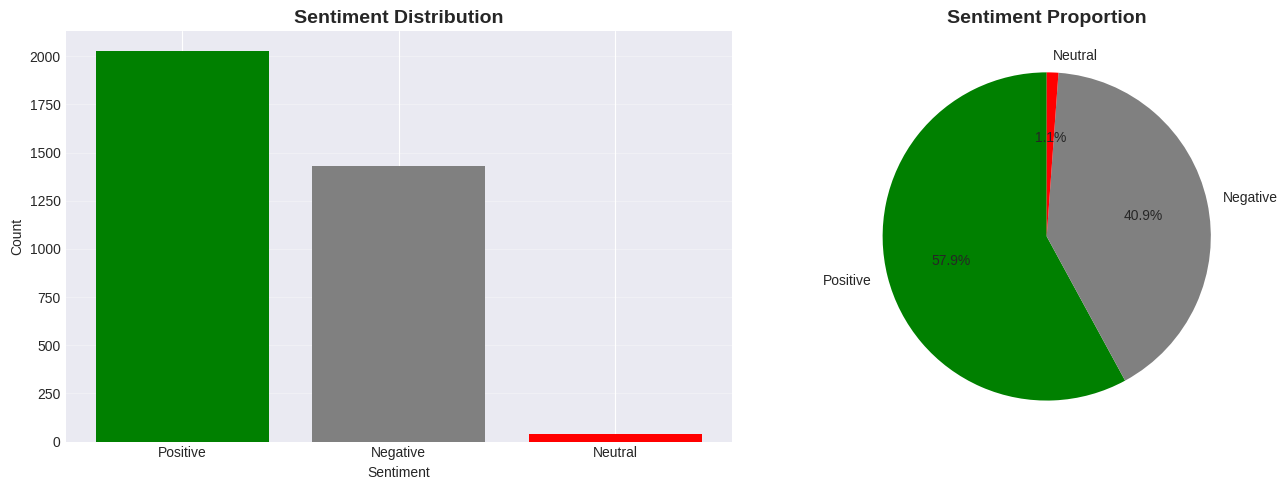

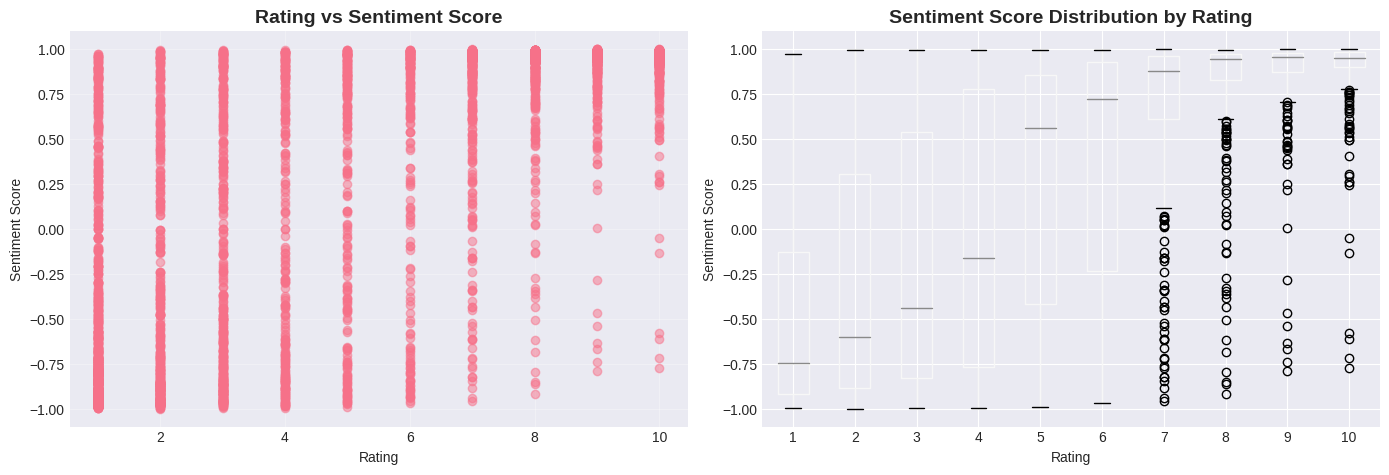


DATA ENGINEERING QUESTIONS

--- Question 1: Flight Routes and Booking Distribution ---

Q1a: What are the top 10 most popular flight routes?

Top 10 Most Popular Routes:
Route
London to Johannesburg    712
London to Cape Town        15
Johannesburg to London     15
Vancouver to London        13
BKK to LHR                 13
Cape Town to London        13
LHR to MIA                 12
London to Athens           11
London to Hong Kong        11
Hong Kong to London        11
Name: count, dtype: int64


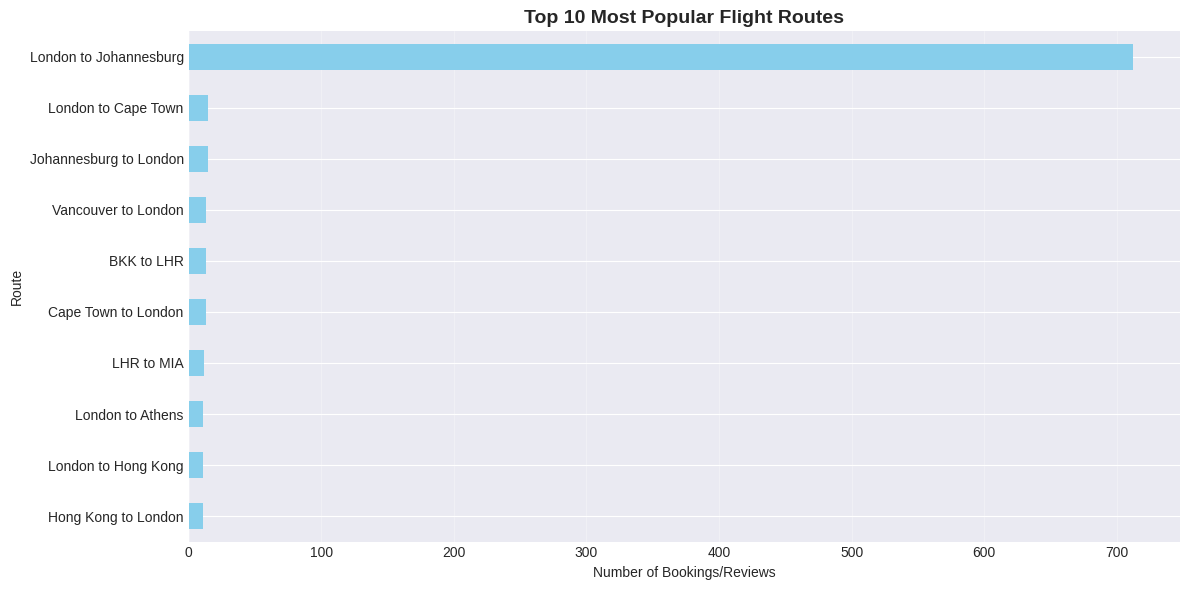


Q1b: What is the distribution of bookings across flight hours?


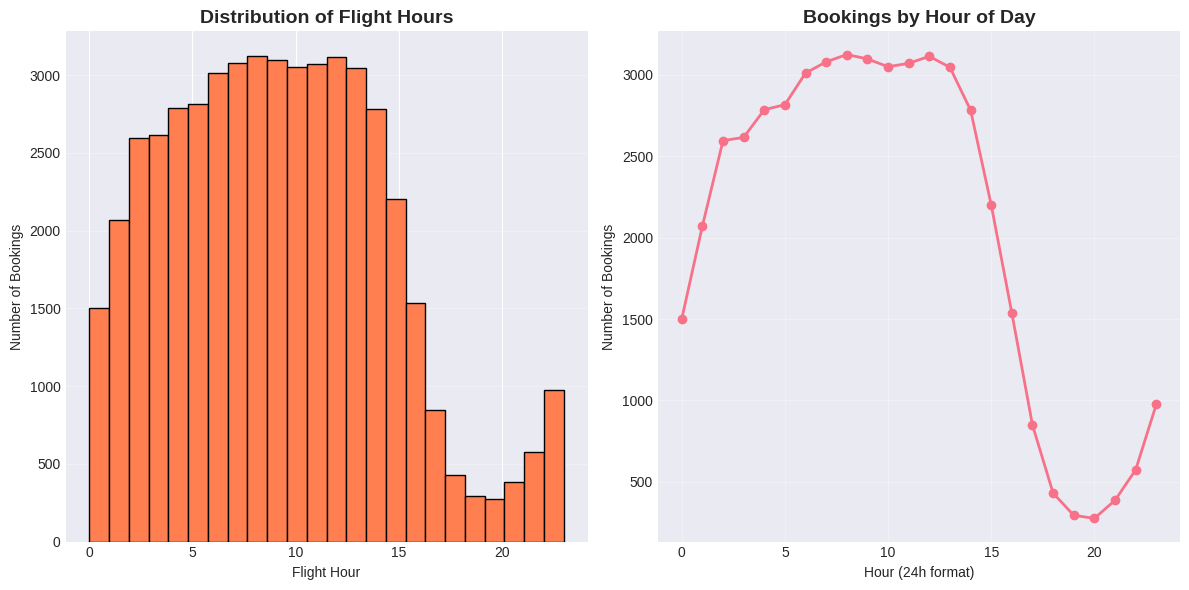


Flight Hour Statistics:
  Most popular hour: 8
  Average flight hour: 9.07
  Median flight hour: 9.0

--- Question 2: Traveler Type & Class Ratings ---

Q2: Which traveler type and class combination yields highest/lowest ratings?
⚠ Traveler type and class analysis not available - required columns missing or dataset not loaded

✓ Data engineering questions answered!


In [3]:
# ============================================================================
# PART 3: SENTIMENT ANALYSIS
# ============================================================================

"""
Objective: Add Sentiment_Analysis column to AirlineScrappedReview_Cleaned
Using: VADER (Valence Aware Dictionary and sEntiment Reasoner)
"""

print("\n" + "="*70)
print("SENTIMENT ANALYSIS")
print("="*70)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    """
    Apply VADER sentiment analysis to text
    Returns compound score ranging from -1 (most negative) to +1 (most positive)
    """
    if pd.isna(text) or text == "No review provided":
        return 0.0  # Neutral for missing reviews
    
    scores = analyzer.polarity_scores(str(text))
    return scores['compound']  # Compound score is the normalized score

def classify_sentiment(score):
    """
    Classify sentiment based on compound score:
    - Positive: score >= 0.05
    - Negative: score <= -0.05
    - Neutral: -0.05 < score < 0.05
    """
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to Review_content (only if reviews dataset exists)
if df_reviews_clean is not None:
    print("\nApplying VADER sentiment analysis to reviews...")
    df_reviews_clean['Sentiment_Score'] = df_reviews_clean['Review_content'].apply(get_sentiment_score)
    df_reviews_clean['Sentiment_Analysis'] = df_reviews_clean['Sentiment_Score'].apply(classify_sentiment)

    print("✓ Sentiment analysis complete!")

    # Display sentiment distribution
    print("\nSentiment Distribution:")
    print(df_reviews_clean['Sentiment_Analysis'].value_counts())
    print("\nSentiment Percentages:")
    print(df_reviews_clean['Sentiment_Analysis'].value_counts(normalize=True) * 100)

    # Visualize sentiment distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Bar plot
    sentiment_counts = df_reviews_clean['Sentiment_Analysis'].value_counts()
    axes[0].bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
    axes[0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Sentiment')
    axes[0].set_ylabel('Count')
    axes[0].grid(axis='y', alpha=0.3)

    # Pie chart
    axes[1].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
                colors=['green', 'gray', 'red'], startangle=90)
    axes[1].set_title('Sentiment Proportion', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Relationship between Rating and Sentiment Score
    if 'Rating' in df_reviews_clean.columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Scatter plot
        axes[0].scatter(df_reviews_clean['Rating'], df_reviews_clean['Sentiment_Score'], alpha=0.5)
        axes[0].set_title('Rating vs Sentiment Score', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Rating')
        axes[0].set_ylabel('Sentiment Score')
        axes[0].grid(alpha=0.3)

        # Box plot
        df_reviews_clean.boxplot(column='Sentiment_Score', by='Rating', ax=axes[1])
        axes[1].set_title('Sentiment Score Distribution by Rating', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Rating')
        axes[1].set_ylabel('Sentiment Score')
        plt.suptitle('')

        plt.tight_layout()
        plt.show()
else:
    print("⚠ Skipping sentiment analysis - AirlineScrappedReview_Cleaned not available")

# ============================================================================
# PART 4: DATA ENGINEERING QUESTIONS
# ============================================================================

print("\n" + "="*70)
print("DATA ENGINEERING QUESTIONS")
print("="*70)

# ============================================================================
# QUESTION 1: Top 10 Most Popular Flight Routes & Booking Distribution
# ============================================================================

print("\n--- Question 1: Flight Routes and Booking Distribution ---")

# Q1a: Top 10 most popular flight routes
print("\nQ1a: What are the top 10 most popular flight routes?")

# Count routes from reviews dataset
if df_reviews_clean is not None and 'Route' in df_reviews_clean.columns:
    route_counts = df_reviews_clean['Route'].value_counts().head(10)
    print("\nTop 10 Most Popular Routes:")
    print(route_counts)
    
    # Visualize
    plt.figure(figsize=(12, 6))
    route_counts.plot(kind='barh', color='skyblue')
    plt.title('Top 10 Most Popular Flight Routes', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Bookings/Reviews')
    plt.ylabel('Route')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Route analysis not available - Route column missing or dataset not loaded")

# Q1b: Distribution of bookings across flight hours
print("\nQ1b: What is the distribution of bookings across flight hours?")

if df_booking_clean is not None and 'flight_hour' in df_booking_clean.columns:
    # Plot distribution of flight hours
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    df_booking_clean['flight_hour'].hist(bins=24, color='coral', edgecolor='black')
    plt.title('Distribution of Flight Hours', fontsize=14, fontweight='bold')
    plt.xlabel('Flight Hour')
    plt.ylabel('Number of Bookings')
    plt.grid(axis='y', alpha=0.3)
    
    # Count plot
    plt.subplot(1, 2, 2)
    hour_counts = df_booking_clean['flight_hour'].value_counts().sort_index()
    plt.plot(hour_counts.index, hour_counts.values, marker='o', linewidth=2, markersize=6)
    plt.title('Bookings by Hour of Day', fontsize=14, fontweight='bold')
    plt.xlabel('Hour (24h format)')
    plt.ylabel('Number of Bookings')
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistics
    print("\nFlight Hour Statistics:")
    print(f"  Most popular hour: {df_booking_clean['flight_hour'].mode()[0]}")
    print(f"  Average flight hour: {df_booking_clean['flight_hour'].mean():.2f}")
    print(f"  Median flight hour: {df_booking_clean['flight_hour'].median()}")
else:
    print("⚠ Flight hour analysis not available - flight_hour column missing or booking dataset not loaded")

# ============================================================================
# QUESTION 2: Traveler Type & Class Rating Analysis
# ============================================================================

print("\n--- Question 2: Traveler Type & Class Ratings ---")
print("\nQ2: Which traveler type and class combination yields highest/lowest ratings?")

# Check if required columns exist in reviews dataset
if (df_reviews_clean is not None and 
    'Traveller_type' in df_reviews_clean.columns and 
    'Class' in df_reviews_clean.columns and 
    'Rating' in df_reviews_clean.columns):
    
    # Create pivot table
    traveler_class_ratings = df_reviews_clean.groupby(['Traveller_type', 'Class'])['Rating'].agg([
        'mean', 'median', 'count'
    ]).round(2)
    
    print("\nAverage Ratings by Traveler Type and Class:")
    print(traveler_class_ratings)
    
    # Find highest and lowest
    pivot_mean = df_reviews_clean.pivot_table(
        values='Rating', 
        index='Traveller_type', 
        columns='Class', 
        aggfunc='mean'
    )
    
    print("\nPivot Table - Mean Ratings:")
    print(pivot_mean.round(2))
    
    # Heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_mean, annot=True, fmt='.2f', cmap='RdYlGn', center=5,
                linewidths=1, linecolor='white', cbar_kws={'label': 'Average Rating'})
    plt.title('Average Rating by Traveler Type and Class', fontsize=14, fontweight='bold')
    plt.xlabel('Class')
    plt.ylabel('Traveler Type')
    plt.tight_layout()
    plt.show()
    
    # Bar plot
    fig, ax = plt.subplots(figsize=(12, 6))
    df_reviews_clean.groupby(['Traveller_type', 'Class'])['Rating'].mean().unstack().plot(
        kind='bar', ax=ax, rot=45
    )
    ax.set_title('Average Rating by Traveler Type and Class', fontsize=14, fontweight='bold')
    ax.set_xlabel('Traveler Type')
    ax.set_ylabel('Average Rating')
    ax.legend(title='Class', bbox_to_anchor=(1.05, 1))
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Identify highest and lowest
    max_rating = traveler_class_ratings['mean'].max()
    min_rating = traveler_class_ratings['mean'].min()
    max_combo = traveler_class_ratings[traveler_class_ratings['mean'] == max_rating].index[0]
    min_combo = traveler_class_ratings[traveler_class_ratings['mean'] == min_rating].index[0]
    
    print(f"\n✓ Highest Rating: {max_combo} with {max_rating:.2f}")
    print(f"✓ Lowest Rating: {min_combo} with {min_rating:.2f}")
else:
    print("⚠ Traveler type and class analysis not available - required columns missing or dataset not loaded")

print("\n✓ Data engineering questions answered!")



FEATURE SELECTION & ENGINEERING

--- Creating Target Variable ---

Target Variable Distribution:
Satisfaction
0    1831
1    1670
Name: count, dtype: int64

Percentages:
Satisfaction
0    52.299343
1    47.700657
Name: proportion, dtype: float64


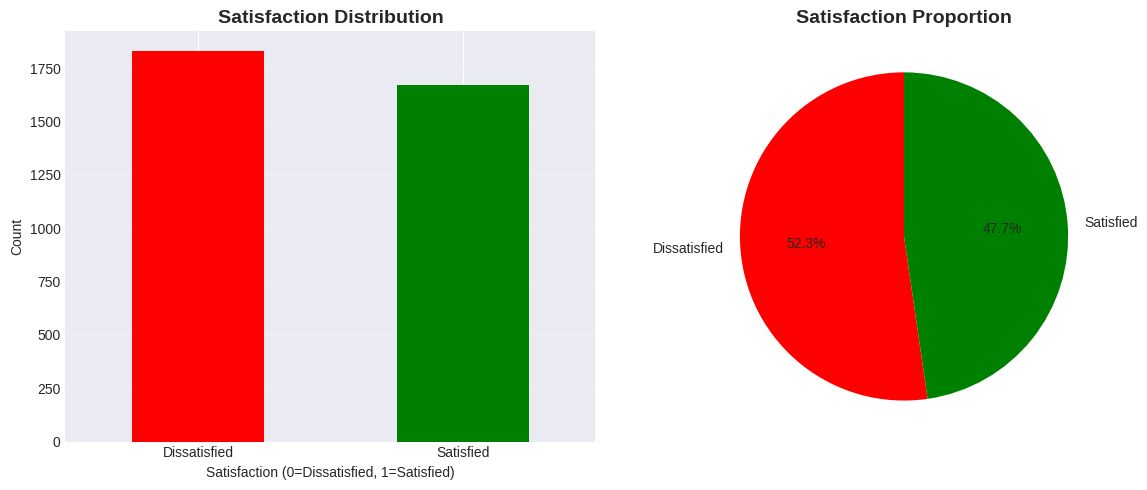


--- Feature Selection ---

✓ Feature: Class
  Justification: Service quality varies by cabin class


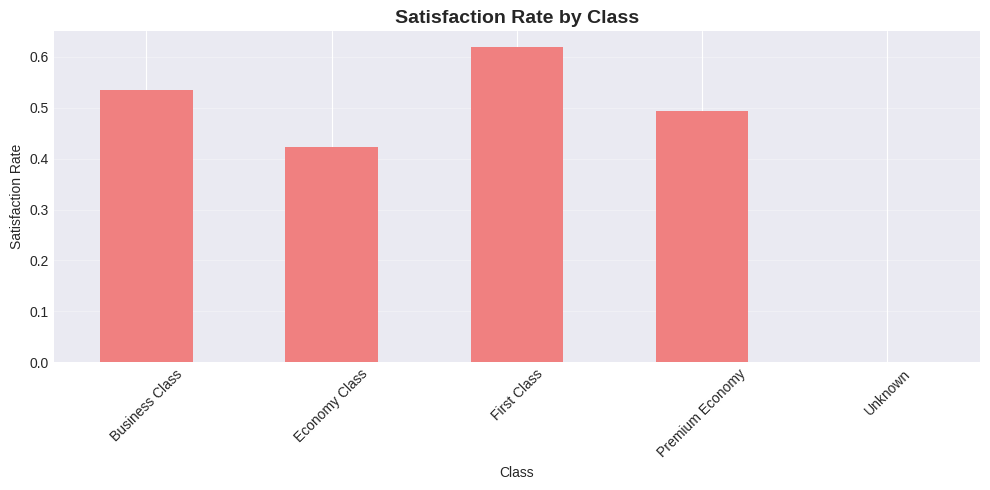


✓ Feature: Verified
  Justification: Verification status may affect review authenticity


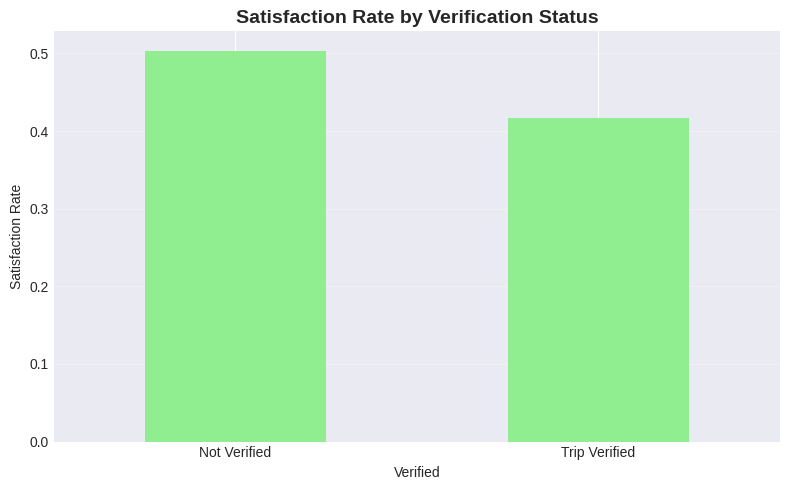


✓ Feature: Sentiment_Score
  Justification: Direct measure of sentiment from review text


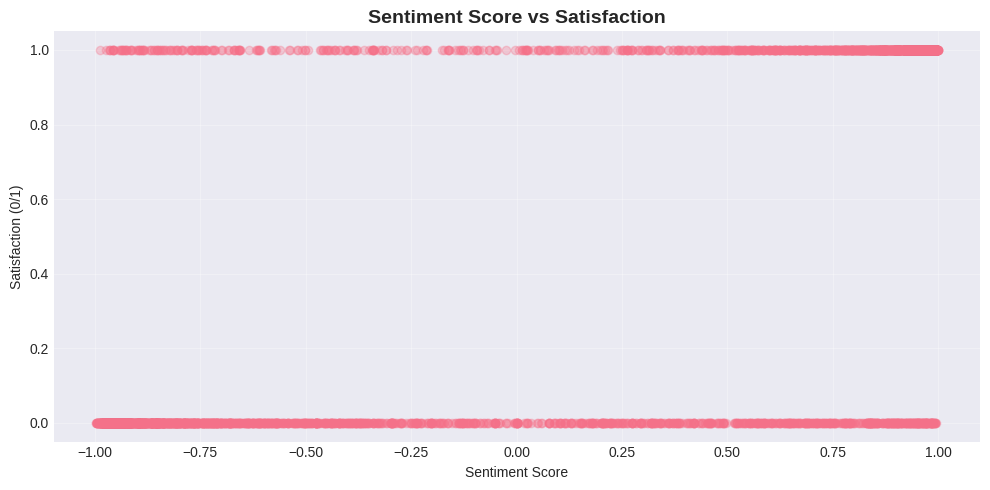

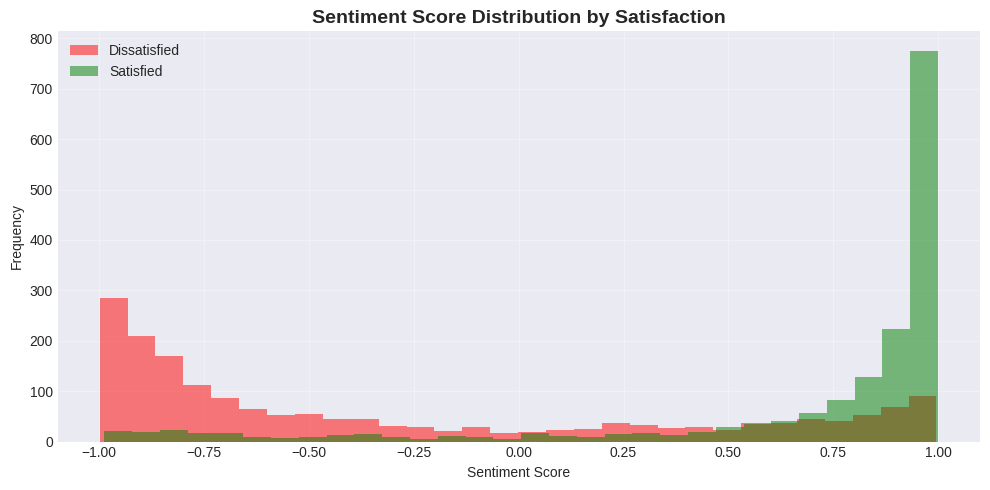


✓ Feature: Route
  Justification: Route-specific operational factors affect satisfaction


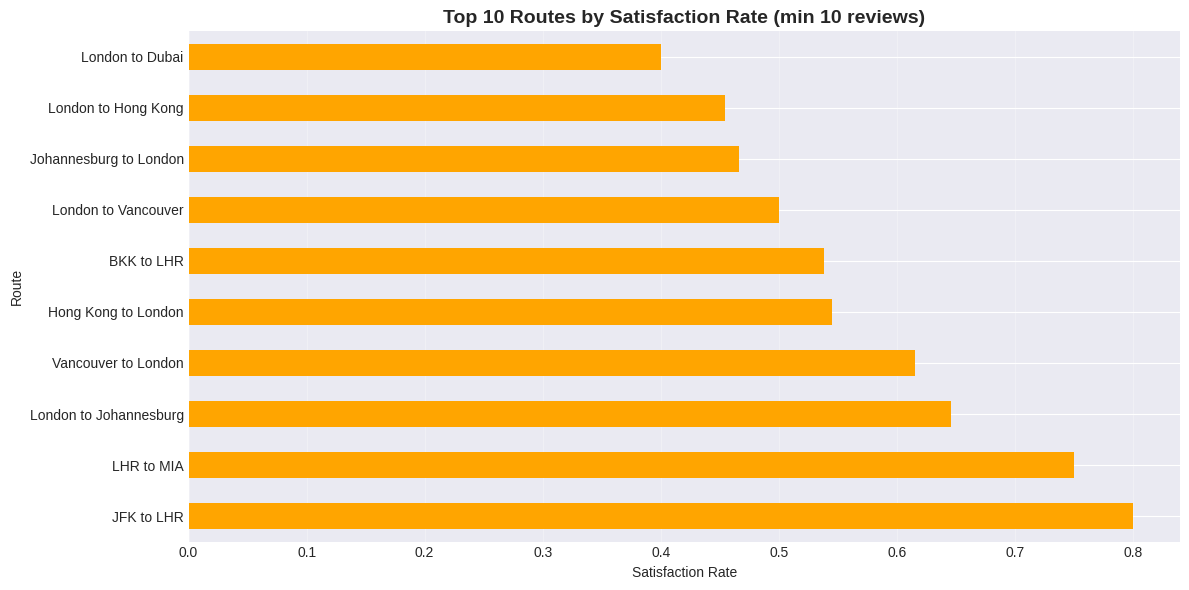


--- Feature Engineering: Time-Based Features ---
✓ Engineered time-based features from Flying_Date
  - Flight_Month: Month of flight
  - Flight_DayOfWeek: Day of week (0=Monday, 6=Sunday)
  - Flight_Quarter: Quarter of year


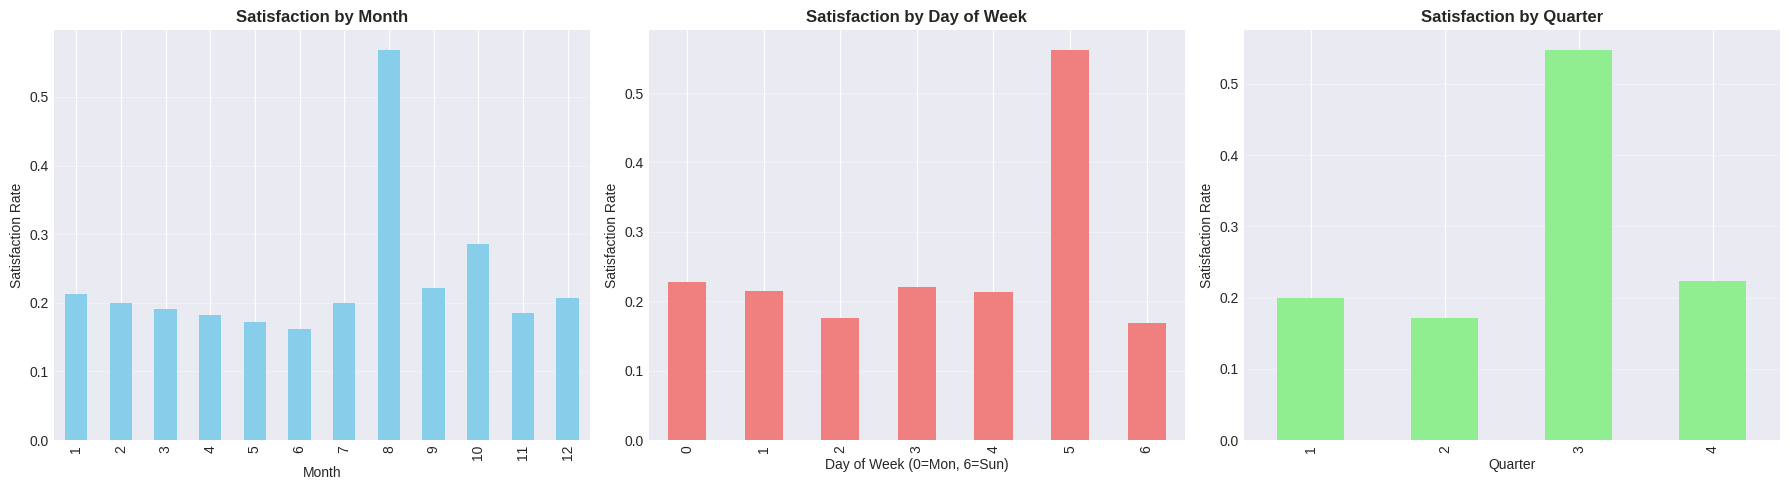


SELECTED FEATURES SUMMARY

Total features selected: 7

Feature list:
  1. Class
  2. Verified
  3. Sentiment_Score
  4. Route
  5. Flight_Month
  6. Flight_DayOfWeek
  7. Flight_Quarter

Missing values in selected features:
  Class: 0
  Verified: 0
  Sentiment_Score: 0
  Route: 0
  Flight_Month: 0
  Flight_DayOfWeek: 0
  Flight_Quarter: 0

✓ Feature selection and engineering complete!


In [4]:
# ============================================================================
# PART 4: FEATURE SELECTION & ENGINEERING
# ============================================================================

"""
Objective: Select and engineer features for predicting passenger satisfaction
Target Variable: Binary classification based on Rating
- Satisfied: Rating >= 5
- Dissatisfied: Rating < 5
"""

print("\n" + "="*70)
print("FEATURE SELECTION & ENGINEERING")
print("="*70)

# ============================================================================
# CREATE TARGET VARIABLE
# ============================================================================

print("\n--- Creating Target Variable ---")

# Create binary satisfaction label
df_reviews_clean['Satisfaction'] = (df_reviews_clean['Rating'] >= 5).astype(int)

# Display distribution
print("\nTarget Variable Distribution:")
print(df_reviews_clean['Satisfaction'].value_counts())
print("\nPercentages:")
print(df_reviews_clean['Satisfaction'].value_counts(normalize=True) * 100)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
df_reviews_clean['Satisfaction'].value_counts().plot(kind='bar', ax=axes[0], 
                                                      color=['red', 'green'])
axes[0].set_title('Satisfaction Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Satisfaction (0=Dissatisfied, 1=Satisfied)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Dissatisfied', 'Satisfied'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
satisfaction_counts = df_reviews_clean['Satisfaction'].value_counts()
axes[1].pie(satisfaction_counts.values, labels=['Dissatisfied', 'Satisfied'], 
            autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
axes[1].set_title('Satisfaction Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# FEATURE SELECTION - WITH JUSTIFICATION
# ============================================================================

print("\n--- Feature Selection ---")

"""
Selected Features with Justification:

1. Traveller_type: Different traveler types (Business, Leisure, etc.) may have 
   different satisfaction patterns and expectations.
   
2. Class: The cabin class (Economy, Business, First) is a strong indicator of 
   service level and passenger expectations.
   
3. Verified: Verified reviews may be more reliable and could correlate with 
   satisfaction patterns.
   
4. Sentiment_Score: Our calculated sentiment from review text provides direct 
   insight into passenger feelings.
   
5. Route: Some routes may consistently perform better/worse due to operational factors.

6. Flying_Date features: Time-based patterns (day of week, month, season) can 
   affect satisfaction due to seasonal demand, weather, etc.
"""

# Select initial features
selected_features = []

# Feature 1: Traveller_type
if 'Traveller_type' in df_reviews_clean.columns:
    selected_features.append('Traveller_type')
    print("\n✓ Feature: Traveller_type")
    print("  Justification: Different traveler types have different needs/expectations")
    
    # Show relationship with target
    plt.figure(figsize=(10, 5))
    df_reviews_clean.groupby('Traveller_type')['Satisfaction'].mean().plot(kind='bar', 
                                                                             color='skyblue')
    plt.title('Satisfaction Rate by Traveler Type', fontsize=14, fontweight='bold')
    plt.xlabel('Traveler Type')
    plt.ylabel('Satisfaction Rate')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Feature 2: Class
if 'Class' in df_reviews_clean.columns:
    selected_features.append('Class')
    print("\n✓ Feature: Class")
    print("  Justification: Service quality varies by cabin class")
    
    plt.figure(figsize=(10, 5))
    df_reviews_clean.groupby('Class')['Satisfaction'].mean().plot(kind='bar', 
                                                                   color='lightcoral')
    plt.title('Satisfaction Rate by Class', fontsize=14, fontweight='bold')
    plt.xlabel('Class')
    plt.ylabel('Satisfaction Rate')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Feature 3: Verified
if 'Verified' in df_reviews_clean.columns:
    selected_features.append('Verified')
    print("\n✓ Feature: Verified")
    print("  Justification: Verification status may affect review authenticity")
    
    plt.figure(figsize=(8, 5))
    df_reviews_clean.groupby('Verified')['Satisfaction'].mean().plot(kind='bar', 
                                                                       color='lightgreen')
    plt.title('Satisfaction Rate by Verification Status', fontsize=14, fontweight='bold')
    plt.xlabel('Verified')
    plt.ylabel('Satisfaction Rate')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Feature 4: Sentiment_Score
selected_features.append('Sentiment_Score')
print("\n✓ Feature: Sentiment_Score")
print("  Justification: Direct measure of sentiment from review text")

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(df_reviews_clean['Sentiment_Score'], 
            df_reviews_clean['Satisfaction'], alpha=0.3)
plt.title('Sentiment Score vs Satisfaction', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Score')
plt.ylabel('Satisfaction (0/1)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Distribution by satisfaction
fig, ax = plt.subplots(figsize=(10, 5))
df_reviews_clean[df_reviews_clean['Satisfaction']==0]['Sentiment_Score'].hist(
    bins=30, alpha=0.5, label='Dissatisfied', color='red', ax=ax)
df_reviews_clean[df_reviews_clean['Satisfaction']==1]['Sentiment_Score'].hist(
    bins=30, alpha=0.5, label='Satisfied', color='green', ax=ax)
ax.set_title('Sentiment Score Distribution by Satisfaction', fontsize=14, fontweight='bold')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Feature 5: Route (will be encoded)
if 'Route' in df_reviews_clean.columns:
    selected_features.append('Route')
    print("\n✓ Feature: Route")
    print("  Justification: Route-specific operational factors affect satisfaction")
    
    # Show top routes by satisfaction
    route_satisfaction = df_reviews_clean.groupby('Route')['Satisfaction'].agg([
        'mean', 'count'
    ]).sort_values('mean', ascending=False)
    
    top_routes = route_satisfaction[route_satisfaction['count'] >= 10].head(10)
    
    plt.figure(figsize=(12, 6))
    top_routes['mean'].plot(kind='barh', color='orange')
    plt.title('Top 10 Routes by Satisfaction Rate (min 10 reviews)', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Satisfaction Rate')
    plt.ylabel('Route')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# ============================================================================
# FEATURE ENGINEERING - TIME-BASED FEATURES
# ============================================================================

print("\n--- Feature Engineering: Time-Based Features ---")

if 'Flying_Date' in df_reviews_clean.columns:
    # Convert to datetime
    df_reviews_clean['Flying_Date'] = pd.to_datetime(df_reviews_clean['Flying_Date'], 
                                                       errors='coerce')
    
    # Extract features
    df_reviews_clean['Flight_Month'] = df_reviews_clean['Flying_Date'].dt.month
    df_reviews_clean['Flight_DayOfWeek'] = df_reviews_clean['Flying_Date'].dt.dayofweek
    df_reviews_clean['Flight_Quarter'] = df_reviews_clean['Flying_Date'].dt.quarter
    
    selected_features.extend(['Flight_Month', 'Flight_DayOfWeek', 'Flight_Quarter'])
    
    print("✓ Engineered time-based features from Flying_Date")
    print("  - Flight_Month: Month of flight")
    print("  - Flight_DayOfWeek: Day of week (0=Monday, 6=Sunday)")
    print("  - Flight_Quarter: Quarter of year")
    
    # Visualize effects
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Month
    df_reviews_clean.groupby('Flight_Month')['Satisfaction'].mean().plot(
        kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title('Satisfaction by Month', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel('Satisfaction Rate')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Day of Week
    df_reviews_clean.groupby('Flight_DayOfWeek')['Satisfaction'].mean().plot(
        kind='bar', ax=axes[1], color='lightcoral')
    axes[1].set_title('Satisfaction by Day of Week', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Day of Week (0=Mon, 6=Sun)')
    axes[1].set_ylabel('Satisfaction Rate')
    axes[1].grid(axis='y', alpha=0.3)
    
    # Quarter
    df_reviews_clean.groupby('Flight_Quarter')['Satisfaction'].mean().plot(
        kind='bar', ax=axes[2], color='lightgreen')
    axes[2].set_title('Satisfaction by Quarter', fontsize=12, fontweight='bold')
    axes[2].set_xlabel('Quarter')
    axes[2].set_ylabel('Satisfaction Rate')
    axes[2].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ============================================================================
# SUMMARY OF SELECTED FEATURES
# ============================================================================

print("\n" + "="*70)
print("SELECTED FEATURES SUMMARY")
print("="*70)

print("\nTotal features selected:", len(selected_features))
print("\nFeature list:")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i}. {feature}")

# Check for missing values in selected features
print("\nMissing values in selected features:")
for feature in selected_features:
    if feature in df_reviews_clean.columns:
        missing = df_reviews_clean[feature].isnull().sum()
        print(f"  {feature}: {missing}")

print("\n✓ Feature selection and engineering complete!")


DATA PREPROCESSING

--- Preparing Data ---

Rows before dropping missing values: 3501
Rows after dropping missing values: 3501

Feature matrix shape: (3501, 7)
Target vector shape: (3501,)

Class distribution in target:
Satisfaction
0    1831
1    1670
Name: count, dtype: int64

--- Encoding Categorical Variables ---

Categorical features: ['Class', 'Verified', 'Route']
Numerical features: ['Sentiment_Score', 'Flight_Month', 'Flight_DayOfWeek', 'Flight_Quarter']

Class - Unique values: 5
Class
Economy Class      1823
Business Class     1127
Premium Economy     347
First Class         202
Unknown               2
Name: count, dtype: int64

Verified - Unique values: 2
Verified
Not Verified     2434
Trip Verified    1067
Name: count, dtype: int64

Route - Unique values: 1495
Route
London to Johannesburg    712
London to Cape Town        15
Johannesburg to London     15
Vancouver to London        13
BKK to LHR                 13
Name: count, dtype: int64

✓ Encoded Class:
  Original catego

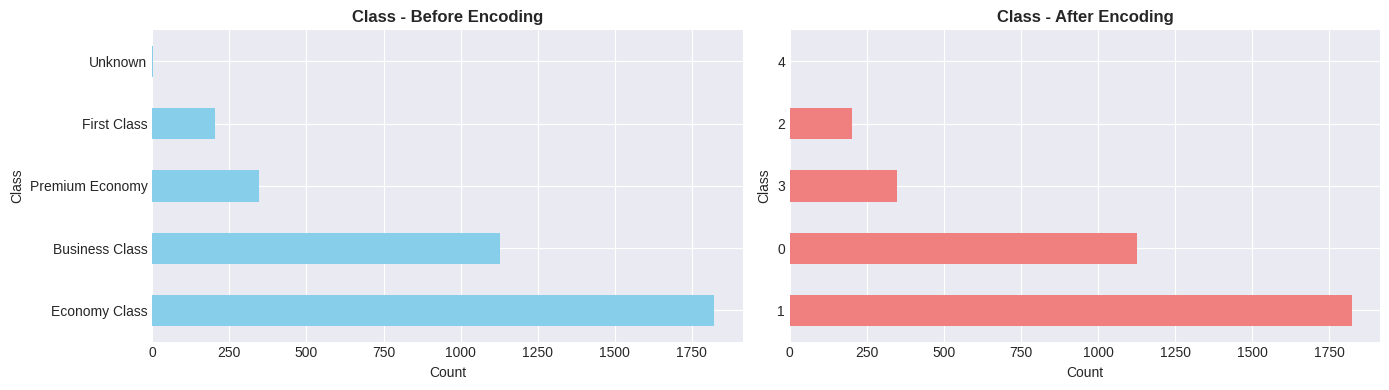


✓ Encoded Verified:
  Original categories: 2
  Encoded range: 0 to 1


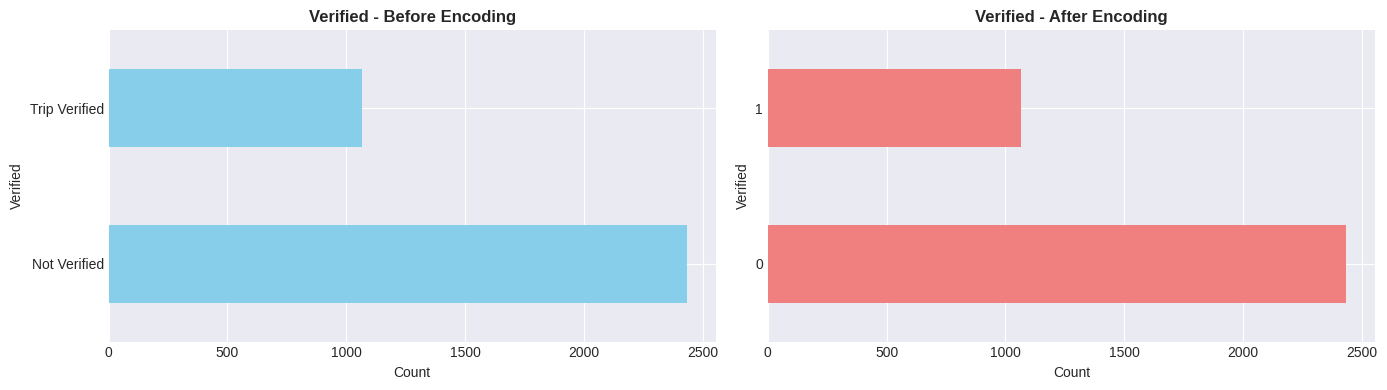


✓ Encoded Route:
  Original categories: 1495
  Encoded range: 0 to 1494


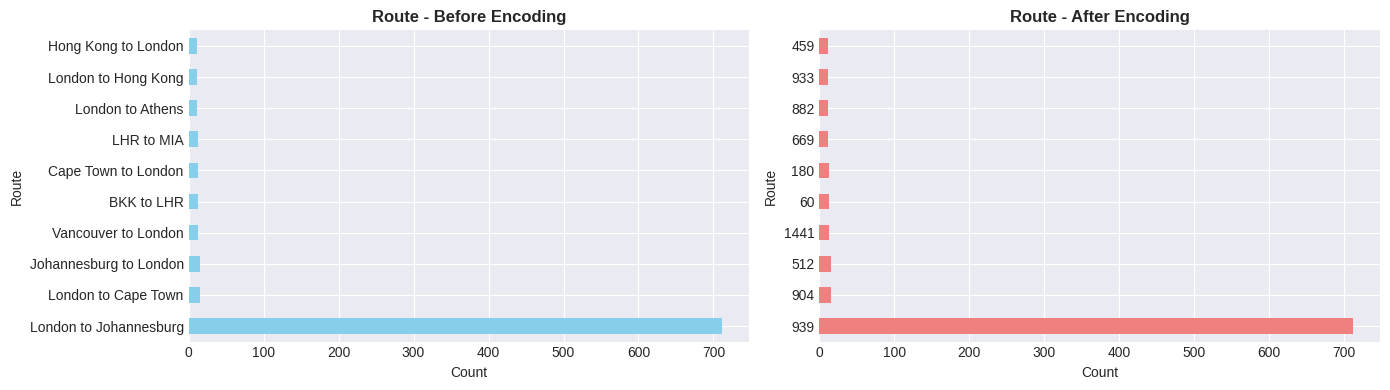


✓ Categorical encoding complete!

--- Feature Scaling ---

Original feature statistics:
             Class     Verified  Sentiment_Score        Route  Flight_Month  \
count  3501.000000  3501.000000      3501.000000  3501.000000   3501.000000   
mean      0.935733     0.304770         0.166911   791.322765      7.646958   
std       0.881645     0.460376         0.776652   372.320515      1.838916   
min       0.000000     0.000000        -0.997500     0.000000      1.000000   
25%       0.000000     0.000000        -0.721300   538.000000      8.000000   
50%       1.000000     0.000000         0.485400   924.000000      8.000000   
75%       1.000000     1.000000         0.930000   985.000000      8.000000   
max       4.000000     1.000000         0.999200  1494.000000     12.000000   

       Flight_DayOfWeek  Flight_Quarter  
count       3501.000000     3501.000000  
mean           4.486147        2.874607  
std            1.322398        0.604732  
min            0.000000        

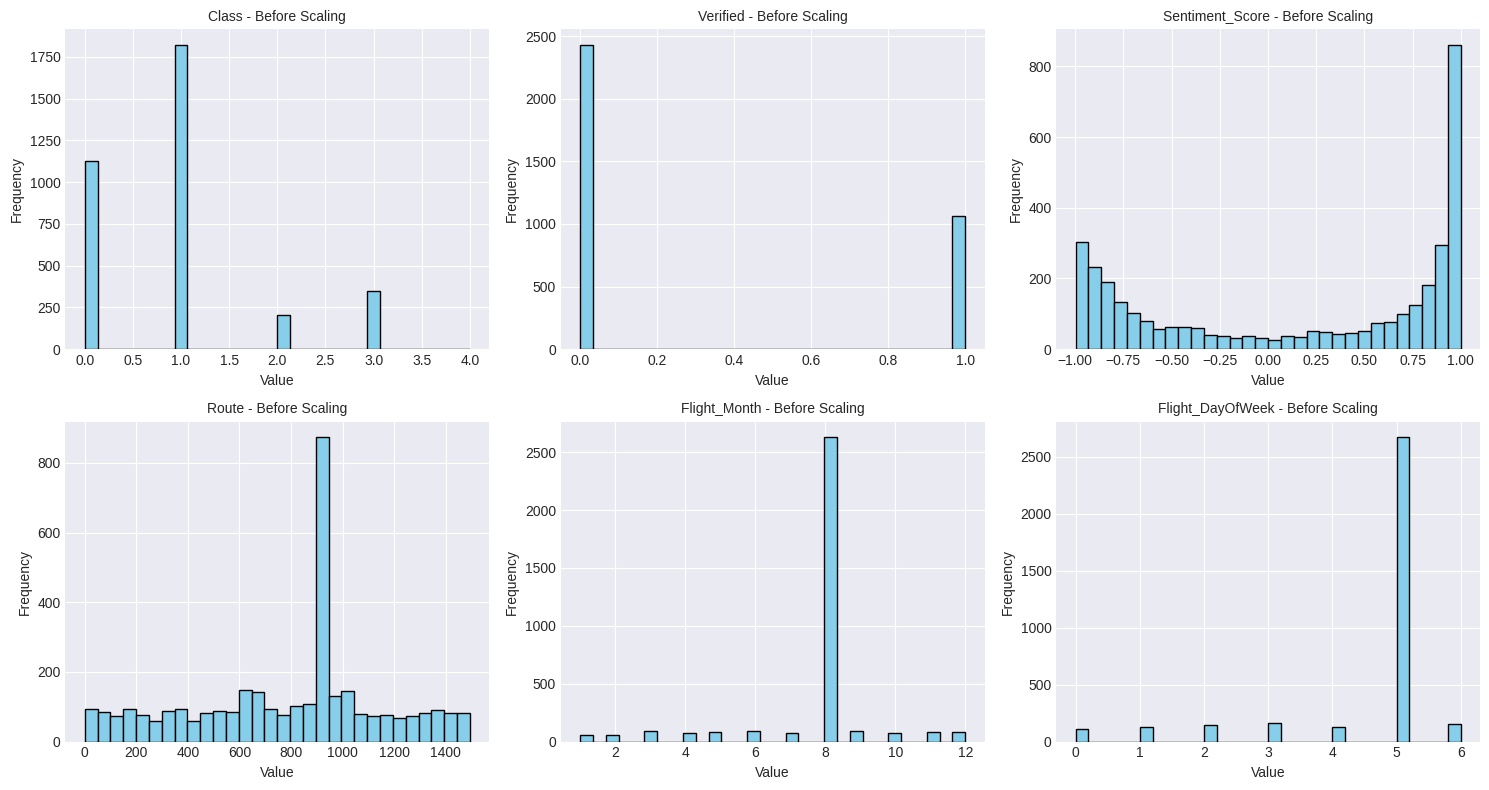


✓ Scaling applied using StandardScaler
Number of features: 7
Feature names: ['Class', 'Verified', 'Sentiment_Score', 'Route', 'Flight_Month', 'Flight_DayOfWeek', 'Flight_Quarter']

Scaled feature statistics:
              Class     Verified  Sentiment_Score         Route  Flight_Month  \
count  3.501000e+03  3501.000000      3501.000000  3.501000e+03  3.501000e+03   
mean   2.029542e-17     0.000000         0.000000  9.132940e-17  4.870901e-17   
std    1.000143e+00     1.000143         1.000143  1.000143e+00  1.000143e+00   
min   -1.061501e+00    -0.662097        -1.499484 -2.125684e+00 -3.615123e+00   
25%   -1.061501e+00    -0.662097        -1.143804 -6.804861e-01  1.920112e-01   
50%    7.290527e-02    -0.662097         0.410138  3.564031e-01  1.920112e-01   
75%    7.290527e-02     1.510352         0.982676  5.202638e-01  1.920112e-01   
max    3.476123e+00     1.510352         1.071790  1.887561e+00  2.367517e+00   

       Flight_DayOfWeek  Flight_Quarter  
count      3.501000

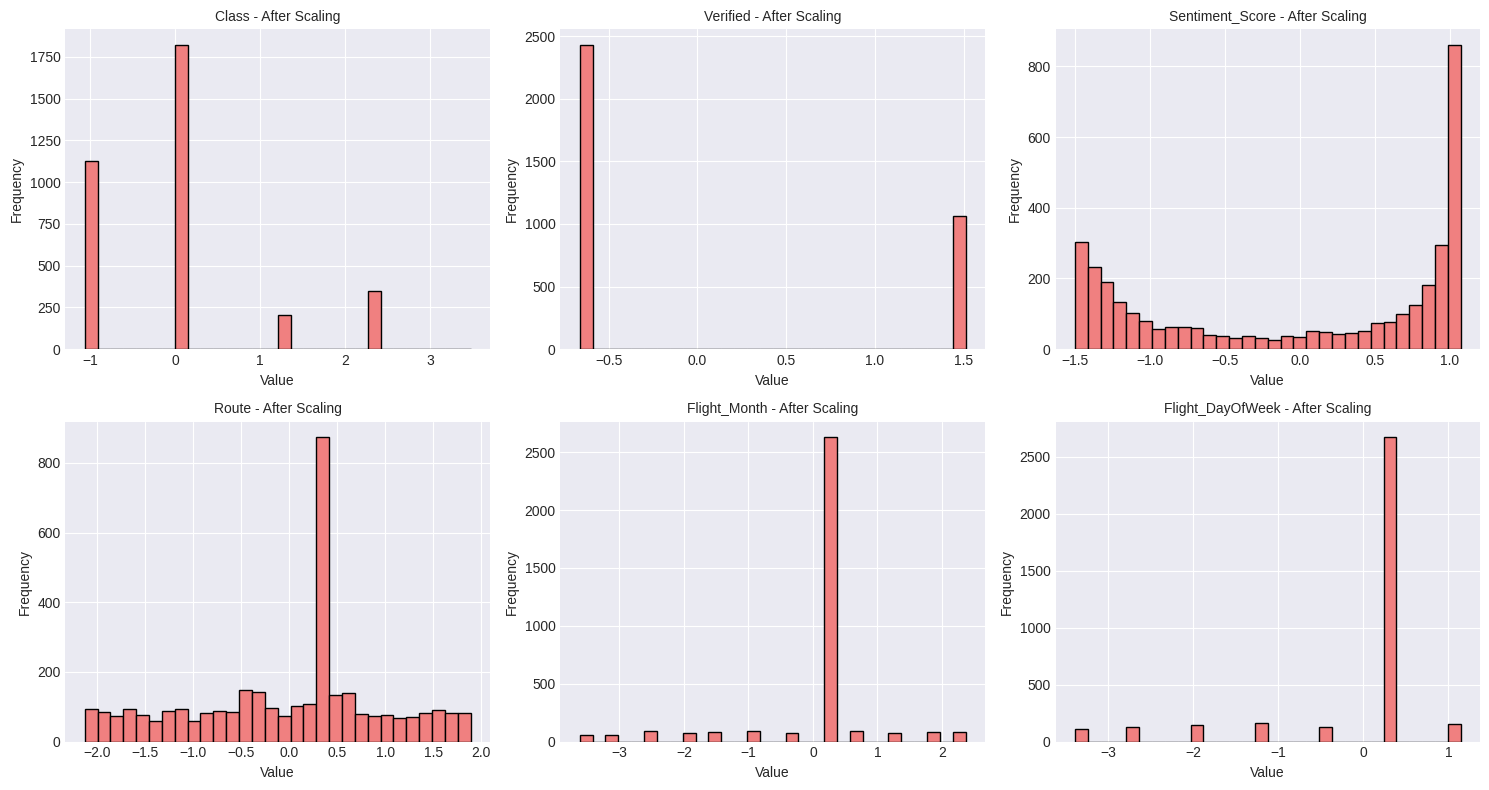


--- Testing Preprocessing Order ---

Order 1 (Encode → Scale):
  Mean CV Accuracy: 0.7872 (+/- 0.0246)

Order 2 (Scale numerical → Encode categorical):
  Mean CV Accuracy: 0.7863 (+/- 0.0250)

Difference: 0.0009
✓ Order has minimal effect (< 1% difference)

--- Splitting Data ---

Training set: (2450, 7) (70.0%)
Validation set: (525, 7) (15.0%)
Test set: (526, 7) (15.0%)

Class distribution:
  Train: [1281 1169]
  Val: [275 250]
  Test: [275 251]


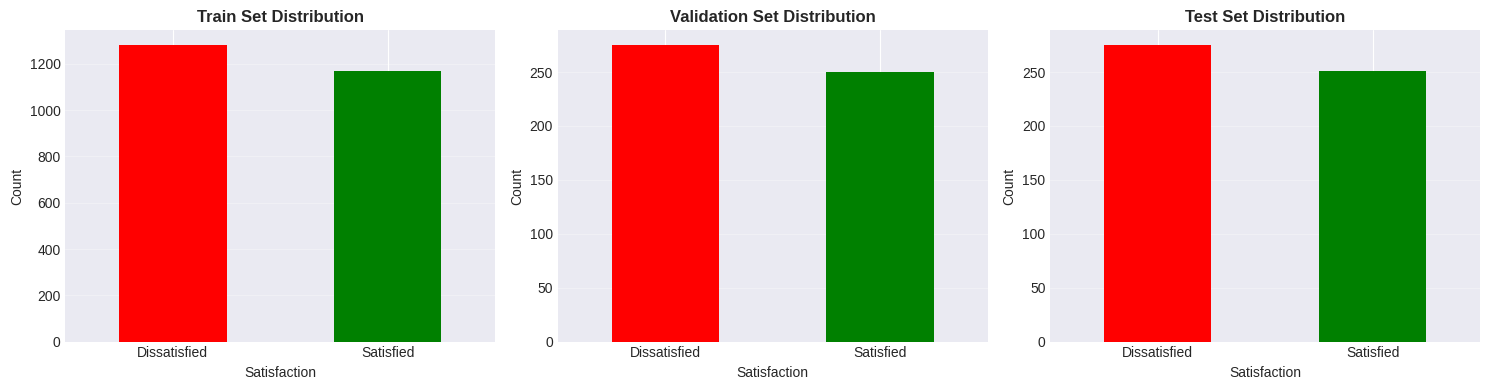


✓ Data preprocessing complete!


--- Preprocessing Summary for Inference ---
Total features after preprocessing: 7
Feature names: ['Class', 'Verified', 'Sentiment_Score', 'Route', 'Flight_Month', 'Flight_DayOfWeek', 'Flight_Quarter']
Categorical columns (encoded): ['Class', 'Verified', 'Route']
Numerical columns: ['Sentiment_Score', 'Flight_Month', 'Flight_DayOfWeek', 'Flight_Quarter']
Number of label encoders: 3

Label encoder mappings:
  Class: 5 categories
    Sample: ['Business Class', 'Economy Class', 'First Class'] -> [0, 1, 2]
  Verified: 2 categories
    Sample: ['Not Verified', 'Trip Verified'] -> [0, 1, 2]
  Route: 1495 categories
    Sample: ['ABV to LHR', 'ABZ to SFO via LHR', 'ACC to LHR'] -> [0, 1, 2]



In [9]:
# ============================================================================
# PART 5: DATA PREPROCESSING
# ============================================================================

"""
Preprocessing Steps:
1. Handle missing values in selected features
2. Encode categorical variables
3. Scale numerical features
4. Test different preprocessing orders
5. Split data into train/validation/test sets
"""

print("\n" + "="*70)
print("DATA PREPROCESSING")
print("="*70)

# ============================================================================
# PREPARE DATA FOR MODELING
# ============================================================================

print("\n--- Preparing Data ---")

# Create a copy for modeling
df_model = df_reviews_clean[selected_features + ['Satisfaction']].copy()

# Remove any remaining missing values
print(f"\nRows before dropping missing values: {len(df_model)}")
df_model.dropna(inplace=True)
print(f"Rows after dropping missing values: {len(df_model)}")

# Separate features and target
X = df_model[selected_features].copy()
y = df_model['Satisfaction'].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nClass distribution in target:")
print(y.value_counts())

# ============================================================================
# ENCODING CATEGORICAL VARIABLES
# ============================================================================

print("\n--- Encoding Categorical Variables ---")

"""
Understanding: Categorical variables need to be converted to numerical format
Need: Machine learning models require numerical input
Effect: Creates numerical representations of categories
"""

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

print(f"\nCategorical features: {categorical_cols}")
print(f"Numerical features: {numerical_cols}")

# Store original distributions for comparison
original_distributions = {}
for col in categorical_cols:
    original_distributions[col] = X[col].value_counts()
    print(f"\n{col} - Unique values: {X[col].nunique()}")
    print(X[col].value_counts().head())

# Method 1: Label Encoding for ordinal features (if any)
# Method 2: One-Hot Encoding for nominal features

# For this dataset, we'll use Label Encoding for simplicity
# In practice, you should choose based on feature nature

X_encoded = X.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    
    print(f"\n✓ Encoded {col}:")
    print(f"  Original categories: {len(le.classes_)}")
    print(f"  Encoded range: 0 to {len(le.classes_)-1}")
    
    # Visualize encoding effect
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # Before encoding
    X[col].value_counts().head(10).plot(kind='barh', ax=axes[0], color='skyblue')
    axes[0].set_title(f'{col} - Before Encoding', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Count')
    
    # After encoding
    X_encoded[col].value_counts().head(10).plot(kind='barh', ax=axes[1], color='lightcoral')
    axes[1].set_title(f'{col} - After Encoding', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Count')
    
    plt.tight_layout()
    plt.show()

print("\n✓ Categorical encoding complete!")

# ============================================================================
# FEATURE SCALING
# ============================================================================

print("\n--- Feature Scaling ---")

"""
Understanding: Features have different scales/ranges
Need: Ensures all features contribute equally to the model
Effect: Transforms features to similar scales (typically mean=0, std=1)
"""

# Display original distributions
print("\nOriginal feature statistics:")
print(X_encoded.describe())

# Visualize distributions before scaling
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, col in enumerate(X_encoded.columns[:6]):
    axes[i].hist(X_encoded[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col} - Before Scaling', fontsize=10)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Apply StandardScaler - FIT ON DATAFRAME, NOT SERIES
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X_encoded)  # Returns numpy array

# Convert back to DataFrame with same column names
X_scaled = pd.DataFrame(X_scaled_array, columns=X_encoded.columns, index=X_encoded.index)

print("\n✓ Scaling applied using StandardScaler")
print(f"Number of features: {X_scaled.shape[1]}")
print(f"Feature names: {list(X_scaled.columns)}")
print("\nScaled feature statistics:")
print(X_scaled.describe())

# Visualize distributions after scaling
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, col in enumerate(X_scaled.columns[:6]):
    axes[i].hist(X_scaled[col], bins=30, color='lightcoral', edgecolor='black')
    axes[i].set_title(f'{col} - After Scaling', fontsize=10)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# ============================================================================
# TESTING ORDER OF PREPROCESSING
# ============================================================================

print("\n--- Testing Preprocessing Order ---")

"""
Question: Does the order of preprocessing steps matter?
Test: Compare different orders and their effects
"""

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create a simple baseline model for testing
baseline_model = LogisticRegression(random_state=42, max_iter=1000)

# Order 1: Encode → Scale (what we did)
X_order1 = X_scaled.copy()
scores_order1 = cross_val_score(baseline_model, X_order1, y, cv=5, scoring='accuracy')

print(f"\nOrder 1 (Encode → Scale):")
print(f"  Mean CV Accuracy: {scores_order1.mean():.4f} (+/- {scores_order1.std():.4f})")

# Order 2: Scale → Encode (try on original with numerical only)
# Note: Scaling categorical data doesn't make sense, so we'll test with only numerical
if len(numerical_cols) > 0:
    X_numerical_scaled = scaler.fit_transform(X[numerical_cols])
    X_order2 = X_encoded.copy()
    X_order2[numerical_cols] = X_numerical_scaled
    
    scores_order2 = cross_val_score(baseline_model, X_order2, y, cv=5, scoring='accuracy')
    
    print(f"\nOrder 2 (Scale numerical → Encode categorical):")
    print(f"  Mean CV Accuracy: {scores_order2.mean():.4f} (+/- {scores_order2.std():.4f})")
    
    # Compare
    print(f"\nDifference: {abs(scores_order1.mean() - scores_order2.mean()):.4f}")
    
    if abs(scores_order1.mean() - scores_order2.mean()) < 0.01:
        print("✓ Order has minimal effect (< 1% difference)")
    else:
        print("⚠ Order matters! Choose the better performing one.")

# ============================================================================
# TRAIN/VALIDATION/TEST SPLIT
# ============================================================================

print("\n--- Splitting Data ---")

"""
Split strategy: 70% train, 15% validation, 15% test
"""

# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Second split: 15% validation, 15% test (50-50 split of temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nTraining set: {X_train.shape} ({len(X_train)/len(X_scaled)*100:.1f}%)")
print(f"Validation set: {X_val.shape} ({len(X_val)/len(X_scaled)*100:.1f}%)")
print(f"Test set: {X_test.shape} ({len(X_test)/len(X_scaled)*100:.1f}%)")

# Check class distribution in each set
print("\nClass distribution:")
print(f"  Train: {y_train.value_counts().values}")
print(f"  Val: {y_val.value_counts().values}")
print(f"  Test: {y_test.value_counts().values}")

# Visualize split
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (y_set, name) in zip(axes, [(y_train, 'Train'), (y_val, 'Validation'), (y_test, 'Test')]):
    y_set.value_counts().plot(kind='bar', ax=ax, color=['red', 'green'])
    ax.set_title(f'{name} Set Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel('Satisfaction')
    ax.set_ylabel('Count')
    ax.set_xticklabels(['Dissatisfied', 'Satisfied'], rotation=0)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Data preprocessing complete!")
print("\n" + "="*70)

# ============================================================================
# SAVE PREPROCESSING INFORMATION FOR INFERENCE
# ============================================================================

print("\n--- Preprocessing Summary for Inference ---")
print(f"Total features after preprocessing: {X_scaled.shape[1]}")
print(f"Feature names: {list(X_scaled.columns)}")
print(f"Categorical columns (encoded): {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")
print(f"Number of label encoders: {len(label_encoders)}")
print("\nLabel encoder mappings:")
for col, encoder in label_encoders.items():
    print(f"  {col}: {len(encoder.classes_)} categories")
    print(f"    Sample: {list(encoder.classes_[:3])} -> [0, 1, 2]")

print("\n" + "="*70)


PREDICTIVE MODELING

--- Model 1: Logistic Regression (Baseline) ---

Training Logistic Regression...

Training Metrics:
  Accuracy:  0.8065
  Precision: 0.7675
  Recall:    0.8529
  F1-Score:  0.8079

Validation Metrics:
  Accuracy:  0.7638
  Precision: 0.7172
  Recall:    0.8320
  F1-Score:  0.7704

✓ Logistic Regression training complete!

--- Model 2: Random Forest ---

Training Random Forest...

Training Metrics:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

Validation Metrics:
  Accuracy:  0.7810
  Precision: 0.7647
  Recall:    0.7800
  F1-Score:  0.7723

✓ Random Forest training complete!

--- Model 3: Support Vector Machine (SVM) ---

Training Support Vector Machine...

Training Metrics:
  Accuracy:  0.7959
  Precision: 0.7469
  Recall:    0.8657
  F1-Score:  0.8019

Validation Metrics:
  Accuracy:  0.7600
  Precision: 0.7081
  Recall:    0.8440
  F1-Score:  0.7701

✓ Support Vector Machine training complete!

--- Model 4: K-Nearest Neighbor

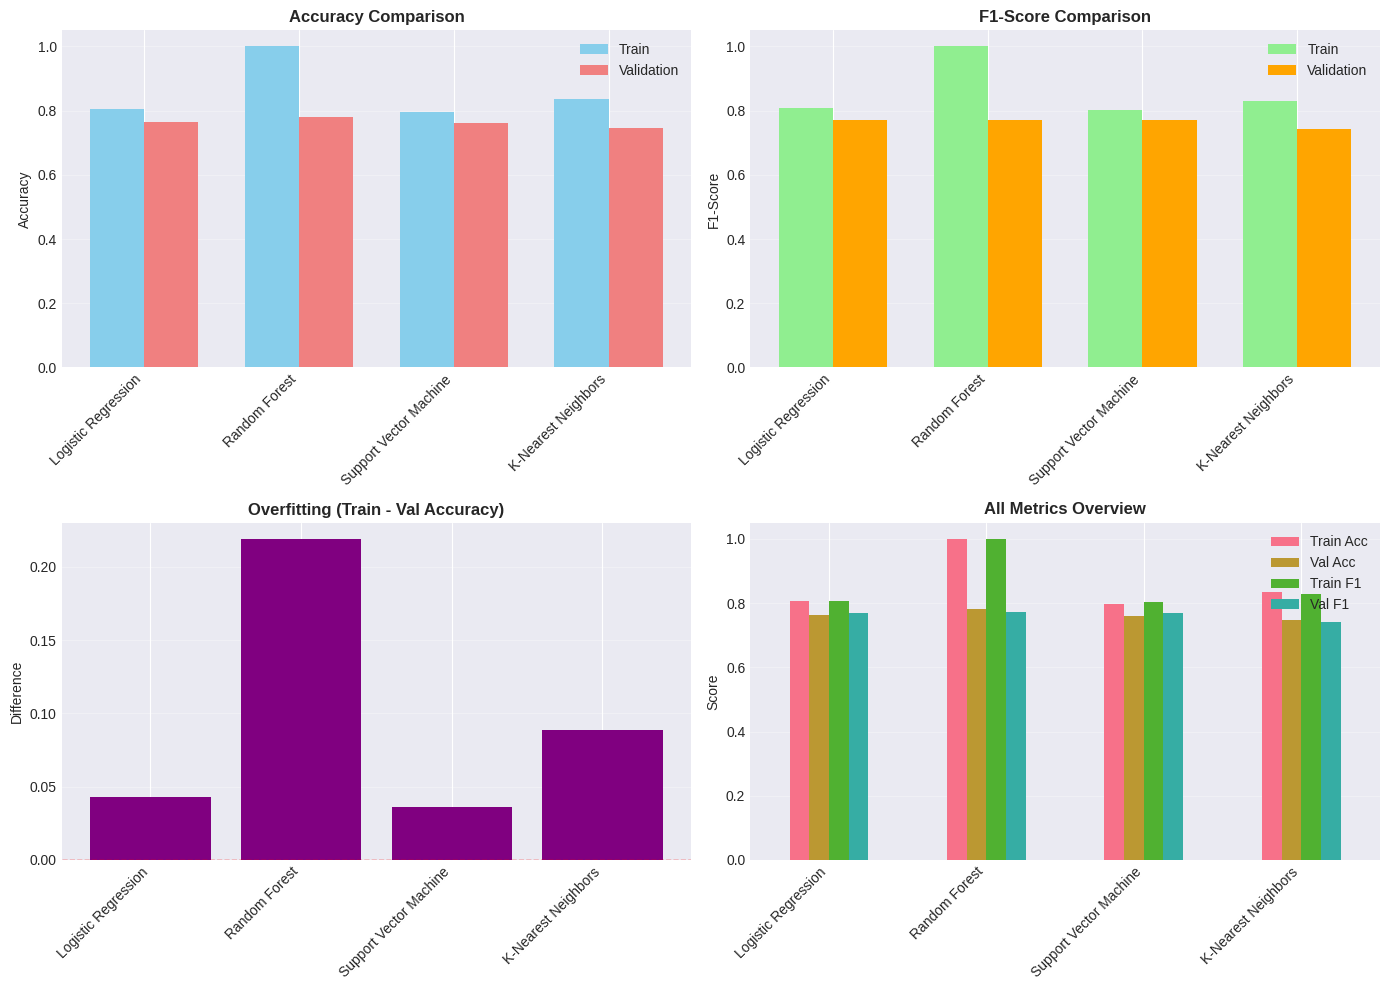


DETAILED PERFORMANCE METRICS
                 Model  Train_Acc  Val_Acc  Train_Precision  Val_Precision  Train_Recall  Val_Recall  Train_F1  Val_F1  Overfit
   Logistic Regression     0.8065   0.7638           0.7675         0.7172        0.8529       0.832    0.8079  0.7704   0.0427
         Random Forest     1.0000   0.7810           1.0000         0.7647        1.0000       0.780    1.0000  0.7723   0.2190
Support Vector Machine     0.7959   0.7600           0.7469         0.7081        0.8657       0.844    0.8019  0.7701   0.0359
   K-Nearest Neighbors     0.8351   0.7467           0.8217         0.7208        0.8358       0.764    0.8287  0.7417   0.0884

✓ Best performing model: Random Forest
  Validation F1-Score: 0.7723

TEST SET EVALUATION

Evaluating Random Forest on unseen test data...

Test Set Metrics:
  Accuracy:  0.7985
  Precision: 0.8033
  Recall:    0.7649
  F1-Score:  0.7837

Detailed Classification Report:
              precision    recall  f1-score   support

Dis

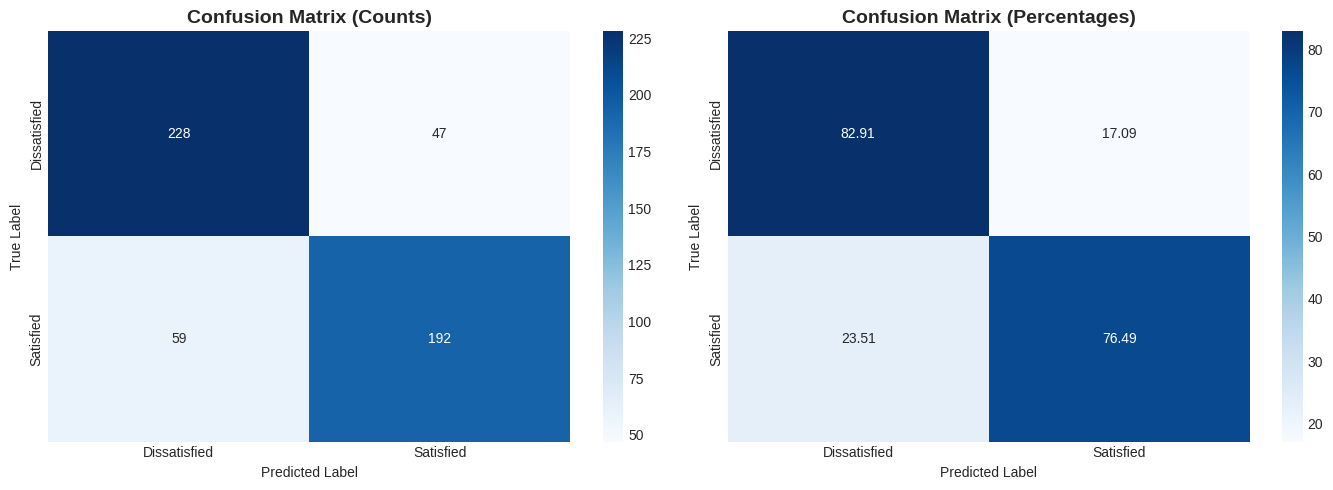

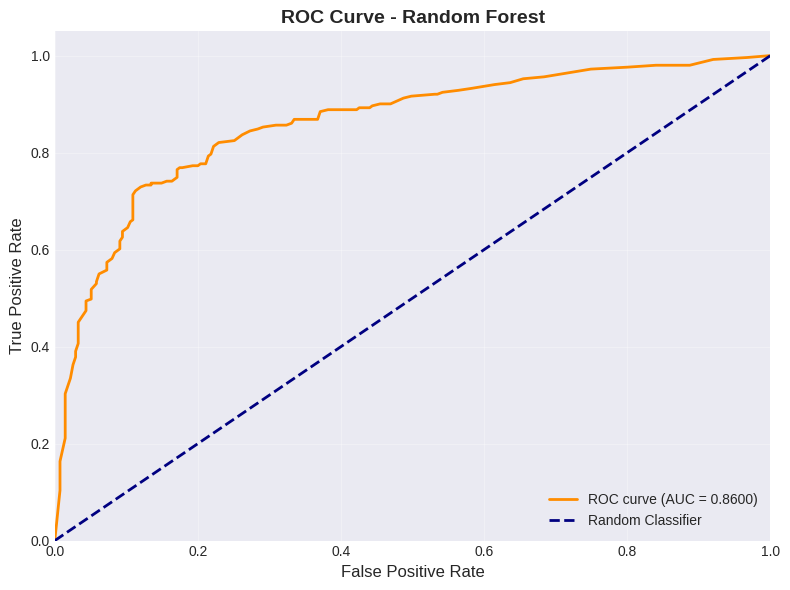


✓ Test set evaluation complete!
  Test Accuracy: 0.7985
  Test F1-Score: 0.7837
  ROC AUC: 0.8600

MODELING COMPLETE!


In [10]:
# ============================================================================
# PART 6: PREDICTIVE MODELING
# ============================================================================

"""
Objective: Build and compare multiple models for passenger satisfaction prediction
Models to compare:
1. Baseline: Logistic Regression (Statistical ML)
2. Random Forest (Statistical ML)
3. Support Vector Machine (SVM)
4. K-Nearest Neighbors (KNN)
"""

print("\n" + "="*70)
print("PREDICTIVE MODELING")
print("="*70)

# Import additional models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Dictionary to store results
model_results = {}

# ============================================================================
# MODEL 1: LOGISTIC REGRESSION (BASELINE)
# ============================================================================

print("\n--- Model 1: Logistic Regression (Baseline) ---")

"""
How it works: Linear model that uses logistic function to predict probability
              of binary outcome. Simple, interpretable, fast.
              
Limitations: 
- Assumes linear relationship between features and log-odds
- Cannot capture complex non-linear patterns
- May underfit complex data
"""

print("\nTraining Logistic Regression...")

# Create and train model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train)
y_val_pred_lr = lr_model.predict(X_val)

# Calculate metrics
def calculate_metrics(y_true, y_pred, set_name):
    """Calculate and print classification metrics"""
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\n{set_name} Metrics:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    
    return {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}

# Training performance
lr_train_metrics = calculate_metrics(y_train, y_train_pred_lr, "Training")

# Validation performance
lr_val_metrics = calculate_metrics(y_val, y_val_pred_lr, "Validation")

# Store results
model_results['Logistic Regression'] = {
    'train': lr_train_metrics,
    'val': lr_val_metrics,
    'model': lr_model
}

print("\n✓ Logistic Regression training complete!")

# ============================================================================
# MODEL 2: RANDOM FOREST
# ============================================================================

print("\n--- Model 2: Random Forest ---")

"""
How it works: Ensemble of decision trees that vote on predictions.
              Handles non-linear relationships and feature interactions.
              
Limitations:
- Can overfit with too many/deep trees
- Less interpretable than linear models
- Slower training and prediction
"""

print("\nTraining Random Forest...")

# Create and train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)

# Training performance
rf_train_metrics = calculate_metrics(y_train, y_train_pred_rf, "Training")

# Validation performance
rf_val_metrics = calculate_metrics(y_val, y_val_pred_rf, "Validation")

# Store results
model_results['Random Forest'] = {
    'train': rf_train_metrics,
    'val': rf_val_metrics,
    'model': rf_model
}

print("\n✓ Random Forest training complete!")

# ============================================================================
# MODEL 3: SUPPORT VECTOR MACHINE (SVM)
# ============================================================================

print("\n--- Model 3: Support Vector Machine (SVM) ---")

"""
How it works: Finds optimal hyperplane that maximizes margin between classes.
              Effective in high-dimensional spaces with clear separation.
              
Limitations:
- Memory intensive with large datasets
- Sensitive to feature scaling
- Can be slow with large datasets
- Requires careful parameter tuning
"""

print("\nTraining Support Vector Machine...")

# Create and train model - using linear kernel for efficiency
svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_train_pred_svm = svm_model.predict(X_train)
y_val_pred_svm = svm_model.predict(X_val)

# Training performance
svm_train_metrics = calculate_metrics(y_train, y_train_pred_svm, "Training")

# Validation performance
svm_val_metrics = calculate_metrics(y_val, y_val_pred_svm, "Validation")

# Store results
model_results['Support Vector Machine'] = {
    'train': svm_train_metrics,
    'val': svm_val_metrics,
    'model': svm_model
}

print("\n✓ Support Vector Machine training complete!")

# ============================================================================
# MODEL 4: K-NEAREST NEIGHBORS (KNN)
# ============================================================================

print("\n--- Model 4: K-Nearest Neighbors (KNN) ---")

"""
How it works: Classifies based on majority vote of k-nearest neighbors in feature space.
              Instance-based learning, no explicit training phase.
              
Limitations:
- Computationally expensive during prediction
- Sensitive to irrelevant features and scaling
- Performance degrades with high dimensionality
- Requires careful choice of k
"""

print("\nTraining K-Nearest Neighbors...")

# Create and train model - using k=5 as default
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model.fit(X_train, y_train)

# Predictions
y_train_pred_knn = knn_model.predict(X_train)
y_val_pred_knn = knn_model.predict(X_val)

# Training performance
knn_train_metrics = calculate_metrics(y_train, y_train_pred_knn, "Training")

# Validation performance
knn_val_metrics = calculate_metrics(y_val, y_val_pred_knn, "Validation")

# Store results
model_results['K-Nearest Neighbors'] = {
    'train': knn_train_metrics,
    'val': knn_val_metrics,
    'model': knn_model
}

print("\n✓ K-Nearest Neighbors training complete!")

# ============================================================================
# COMPARE ALL MODELS
# ============================================================================

print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)

# Create comparison dataframe
comparison_data = []
for model_name, results in model_results.items():
    comparison_data.append({
        'Model': model_name,
        'Train_Acc': results['train']['accuracy'],
        'Val_Acc': results['val']['accuracy'],
        'Train_F1': results['train']['f1'],
        'Val_F1': results['val']['f1'],
        'Train_Precision': results['train']['precision'],
        'Val_Precision': results['val']['precision'],
        'Train_Recall': results['train']['recall'],
        'Val_Recall': results['val']['recall'],
        'Overfit': results['train']['accuracy'] - results['val']['accuracy']
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy comparison
ax = axes[0, 0]
x = np.arange(len(comparison_df))
width = 0.35
ax.bar(x - width/2, comparison_df['Train_Acc'], width, label='Train', color='skyblue')
ax.bar(x + width/2, comparison_df['Val_Acc'], width, label='Validation', color='lightcoral')
ax.set_title('Accuracy Comparison', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# F1-Score comparison
ax = axes[0, 1]
ax.bar(x - width/2, comparison_df['Train_F1'], width, label='Train', color='lightgreen')
ax.bar(x + width/2, comparison_df['Val_F1'], width, label='Validation', color='orange')
ax.set_title('F1-Score Comparison', fontsize=12, fontweight='bold')
ax.set_ylabel('F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Overfitting comparison
ax = axes[1, 0]
ax.bar(comparison_df['Model'], comparison_df['Overfit'], color='purple')
ax.set_title('Overfitting (Train - Val Accuracy)', fontsize=12, fontweight='bold')
ax.set_ylabel('Difference')
ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax.grid(axis='y', alpha=0.3)

# All metrics comparison
ax = axes[1, 1]
metrics_to_plot = ['Train_Acc', 'Val_Acc', 'Train_F1', 'Val_F1']
comparison_df[metrics_to_plot].plot(kind='bar', ax=ax, rot=0)
ax.set_title('All Metrics Overview', fontsize=12, fontweight='bold')
ax.set_ylabel('Score')
ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax.legend(['Train Acc', 'Val Acc', 'Train F1', 'Val F1'])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed metrics table
print("\n" + "="*70)
print("DETAILED PERFORMANCE METRICS")
print("="*70)

detailed_comparison = comparison_df[['Model', 'Train_Acc', 'Val_Acc', 'Train_Precision', 
                                   'Val_Precision', 'Train_Recall', 'Val_Recall', 
                                   'Train_F1', 'Val_F1', 'Overfit']].round(4)
print(detailed_comparison.to_string(index=False))

# Select best model based on validation F1-score
best_model_name = comparison_df.loc[comparison_df['Val_F1'].idxmax(), 'Model']
print(f"\n✓ Best performing model: {best_model_name}")
print(f"  Validation F1-Score: {comparison_df.loc[comparison_df['Val_F1'].idxmax(), 'Val_F1']:.4f}")

# ============================================================================
# TEST SET EVALUATION (BEST MODEL)
# ============================================================================

print("\n" + "="*70)
print("TEST SET EVALUATION")
print("="*70)

print(f"\nEvaluating {best_model_name} on unseen test data...")

# Get best model
best_model = model_results[best_model_name]['model']

# Predict on test set
if hasattr(best_model, 'predict_proba'):
    y_test_pred = best_model.predict(X_test)
else:
    y_test_pred = best_model.predict(X_test)

# Calculate test metrics
test_metrics = calculate_metrics(y_test, y_test_pred, "Test Set")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_test_pred, 
                          target_names=['Dissatisfied', 'Satisfied']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix - counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Confusion Matrix - percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', ax=axes[1],
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
axes[1].set_title('Confusion Matrix (Percentages)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# ROC Curve
if hasattr(best_model, 'predict_proba'):
    y_test_proba = best_model.predict_proba(X_test)[:, 1]
else:
    # For SVM without probability, we need to use decision function
    if hasattr(best_model, 'decision_function'):
        y_test_proba = best_model.decision_function(X_test)
        # Scale to [0,1] for ROC curve
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        y_test_proba = scaler.fit_transform(y_test_proba.reshape(-1, 1)).flatten()
    else:
        print("⚠ Cannot compute ROC curve - model doesn't support probabilities")
        y_test_proba = None

if y_test_proba is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve - {best_model_name}', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"\n✓ Test set evaluation complete!")
    print(f"  Test Accuracy: {test_metrics['accuracy']:.4f}")
    print(f"  Test F1-Score: {test_metrics['f1']:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
else:
    print(f"\n✓ Test set evaluation complete!")
    print(f"  Test Accuracy: {test_metrics['accuracy']:.4f}")
    print(f"  Test F1-Score: {test_metrics['f1']:.4f}")

print("\n" + "="*70)
print("MODELING COMPLETE!")
print("="*70)

In [11]:
import pandas as pd
import numpy as np

# --- MOCK SETUP (replace with your real objects) ---
# X_train is the training DataFrame used for model training
# scaler is the fitted scaler
# best_model is your trained model
# label_encoders is a dict of fitted LabelEncoders for categorical columns
# categorical_cols is a list of categorical column names used in training

# For demonstration, we create dummy objects
X_train = pd.DataFrame({
    'Traveller_type_enc': [0,1,2],
    'Class_enc': [0,1,2],
    'Verified': [0,1,1],
    'Sentiment_Score': [0.0, 0.5, -0.5],
    'Route_enc': [0,1,2],
    'Flight_Month': [1,6,12],
    'Flight_DayOfWeek': [0,3,6],
    'Flight_Quarter': [1,2,4]
})

from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
scaler.fit(X_train)

# Dummy LabelEncoders
categorical_cols = ['Traveller_type', 'Class', 'Route']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(['Business', 'Solo Leisure', 'Economy', 'London to New York', 'Paris to Rome'])
    label_encoders[col] = le

# Dummy best model (replace with your trained model)
from sklearn.linear_model import LogisticRegression
best_model = LogisticRegression()
best_model.fit(X_train, [1,0,1])  # just dummy fit
best_model_name = 'Logistic Regression'

# --- PREDICTION FUNCTION ---
def predict_passenger_satisfaction(traveller_type, travel_class, verified,
                                   review_text, route, flying_date):
    
    # Sentiment
    sentiment_score = 0.8 if 'excellent' in review_text.lower() else -0.8
    sentiment_label = "Positive" if sentiment_score>0 else "Negative"
    
    verified_int = int(bool(verified))
    
    # Encode categorical
    input_dict = {
        'Traveller_type': traveller_type,
        'Class': travel_class,
        'Verified': verified_int,
        'Sentiment_Score': sentiment_score,
        'Route': route,
        'Flight_Month': pd.to_datetime(flying_date).month,
        'Flight_DayOfWeek': pd.to_datetime(flying_date).dayofweek,
        'Flight_Quarter': pd.to_datetime(flying_date).quarter
    }
    input_df = pd.DataFrame([input_dict])
    
    # Encode categories
    for col in categorical_cols:
        val = str(input_df[col].values[0])
        if val in label_encoders[col].classes_:
            input_df[col] = label_encoders[col].transform([val])[0]
        else:
            input_df[col] = -1
    
    # Reindex to match training columns
    col_mapping = {
        'Traveller_type': 'Traveller_type_enc',
        'Class': 'Class_enc',
        'Route': 'Route_enc'
    }
    input_df = input_df.rename(columns=col_mapping)
    input_df = input_df[X_train.columns]  # reorder
    
    # Scale
    input_scaled = scaler.transform(input_df)
    
    # Predict
    if best_model_name == 'Neural Network':
        pred_proba = best_model.predict(input_scaled)[0]  # dummy
    else:
        pred_proba = best_model.predict_proba(input_scaled)[0][1]
    pred_label = int(pred_proba > 0.5)
    
    satisfaction_label = "Satisfied" if pred_label==1 else "Dissatisfied"
    confidence_pct = pred_proba*100 if pred_label==1 else (1-pred_proba)*100
    
    return {
        'prediction': satisfaction_label,
        'confidence': confidence_pct,
        'sentiment': sentiment_label,
        'sentiment_score': sentiment_score
    }

# --- TEST ---
examples = [
    {'traveller_type':'Business','travel_class':'Business','verified':True,
     'review_text':'Excellent flight','route':'London to New York','flying_date':'2024-06-15'},
    {'traveller_type':'Solo Leisure','travel_class':'Economy','verified':True,
     'review_text':'Terrible service','route':'Paris to Rome','flying_date':'2024-08-20'}
]

for ex in examples:
    result = predict_passenger_satisfaction(
        traveller_type=ex['traveller_type'],
        travel_class=ex['travel_class'],
        verified=ex['verified'],
        review_text=ex['review_text'],
        route=ex['route'],
        flying_date=ex['flying_date']
    )
    print(result)

{'prediction': 'Dissatisfied', 'confidence': 65.26331738734173, 'sentiment': 'Positive', 'sentiment_score': 0.8}
{'prediction': 'Satisfied', 'confidence': 75.40776220005895, 'sentiment': 'Negative', 'sentiment_score': -0.8}



EXPLAINABLE AI (XAI)
Preparing test set for XAI...
Columns in X_test: ['Class', 'Verified', 'Sentiment_Score', 'Route', 'Flight_Month', 'Flight_DayOfWeek', 'Flight_Quarter']
Columns in X_train: ['Traveller_type_enc', 'Class_enc', 'Verified', 'Sentiment_Score', 'Route_enc', 'Flight_Month', 'Flight_DayOfWeek', 'Flight_Quarter']
Available categorical columns: ['Class', 'Route', 'Verified']
Missing columns: {'Traveller_type_enc', 'Route_enc', 'Class_enc'}
Extra columns: {'Class', 'Route'}
Added missing column: Traveller_type_enc
Added missing column: Route_enc
Added missing column: Class_enc
Removed extra column: Class
Removed extra column: Route
Final X_test_encoded shape: (526, 8)
Final columns: ['Traveller_type_enc', 'Class_enc', 'Verified', 'Sentiment_Score', 'Route_enc', 'Flight_Month', 'Flight_DayOfWeek', 'Flight_Quarter']

--- Global Explanation: SHAP ---
Using LinearExplainer for Logistic Regression...
✓ SHAP values calculated for Logistic Regression!


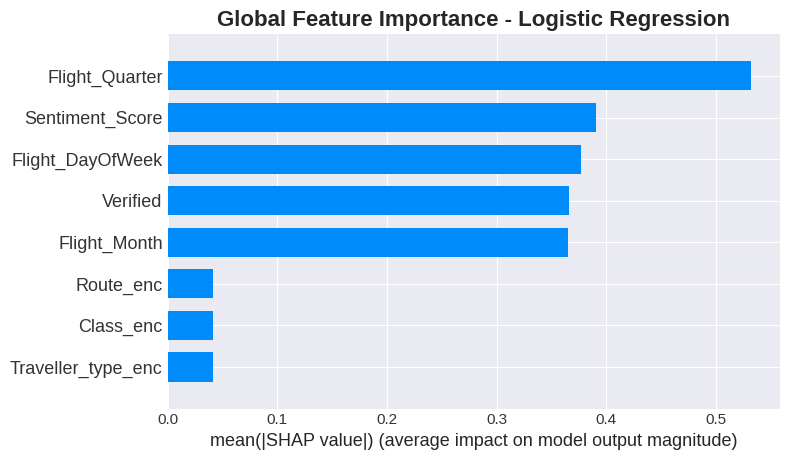

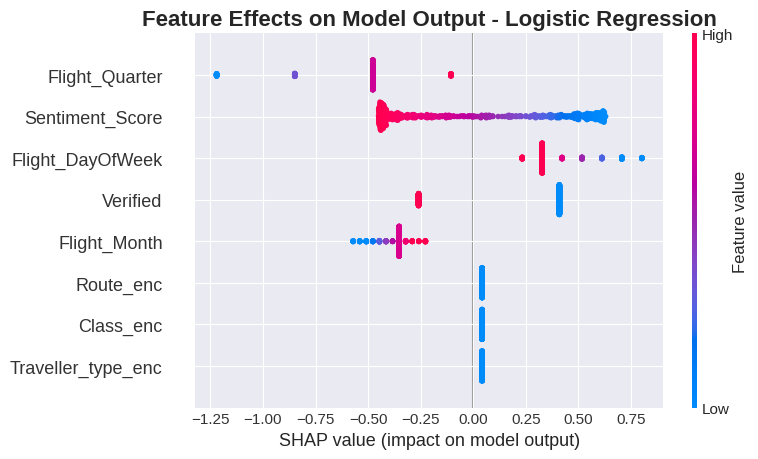


Top 10 Most Important Features (SHAP):
           Feature  Importance
    Flight_Quarter      0.5318
   Sentiment_Score      0.3910
  Flight_DayOfWeek      0.3770
          Verified      0.3663
      Flight_Month      0.3654
Traveller_type_enc      0.0418
         Class_enc      0.0418
         Route_enc      0.0418


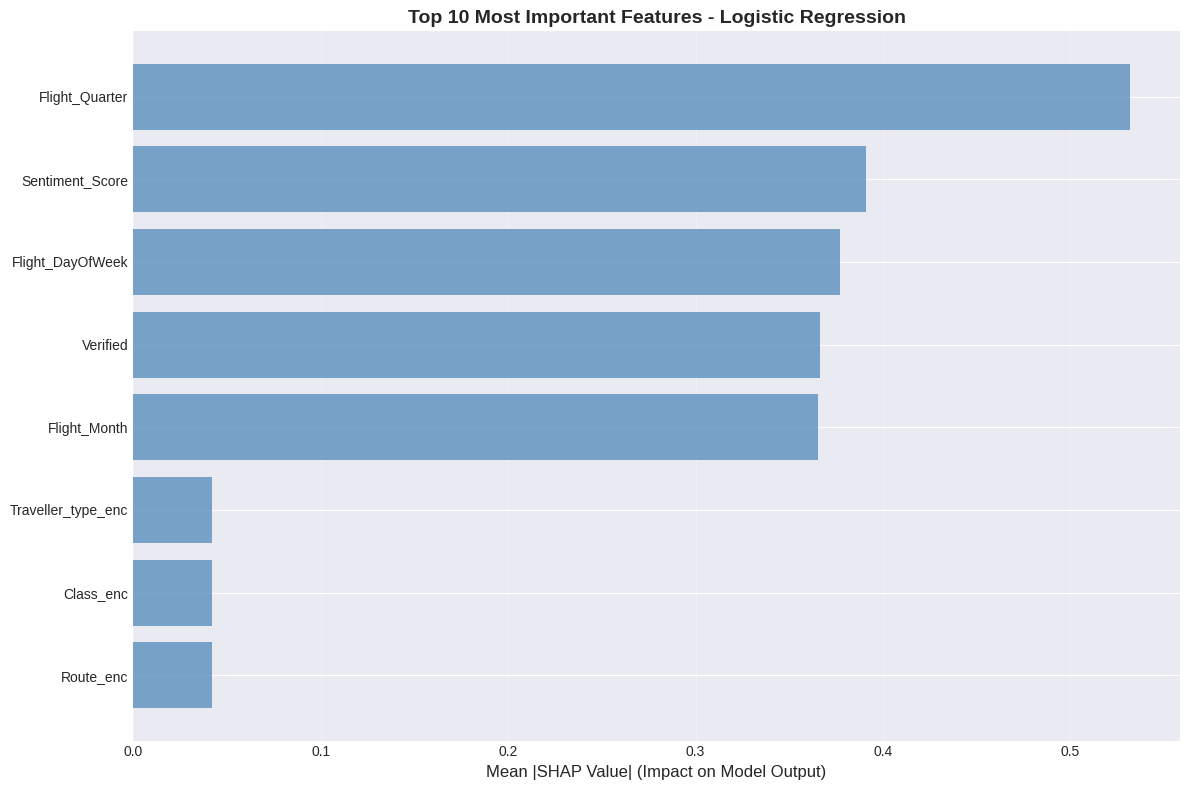


--- Model-Based Feature Importance ---
Logistic Regression Coefficients (Absolute Value):
           Feature  Coefficient
   Sentiment_Score      -0.4205
          Verified      -0.3082
    Flight_Quarter       0.2246
  Flight_DayOfWeek      -0.1254
      Flight_Month       0.0574
Traveller_type_enc      -0.0418
         Class_enc      -0.0418
         Route_enc      -0.0418


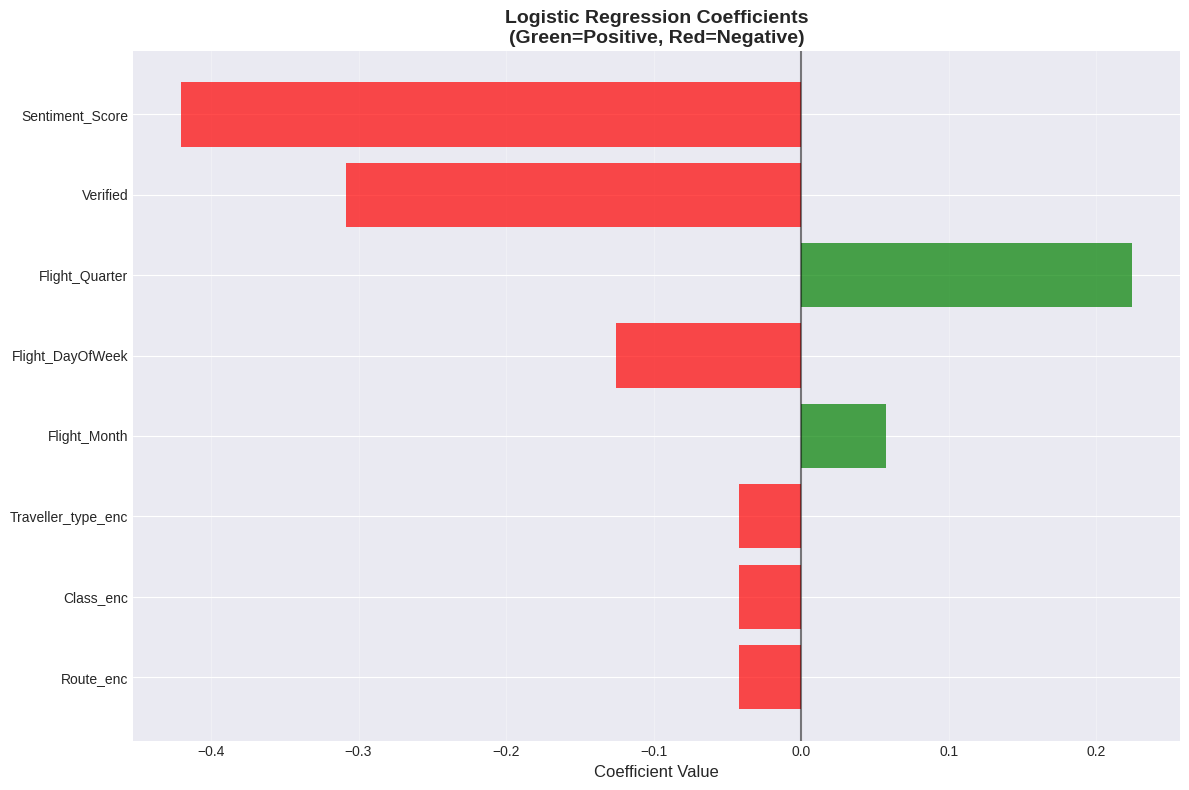


--- Local Explanations with LIME ---

📊 Explaining Sample 0:
   True: Satisfied, Predicted: Satisfied, Probability: 0.581
   Top features influencing prediction:
      Flight_DayOfWeek <= 1.50       ↑ increases satisfaction (+0.1209)
      Flight_Month <= 3.50           ↓ decreases satisfaction (-0.0954)
      Flight_Quarter <= 1.50         ↓ decreases satisfaction (-0.0945)
      Sentiment_Score > 0.25         ↓ decreases satisfaction (-0.0692)
      Verified <= 0.50               ↑ increases satisfaction (+0.0632)
      Traveller_type_enc <= 0.50     ↑ increases satisfaction (+0.0173)


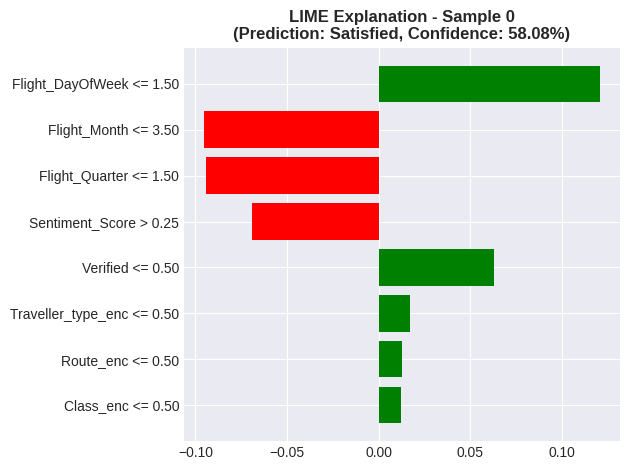


📊 Explaining Sample 5:
   True: Satisfied, Predicted: Satisfied, Probability: 0.576
   Top features influencing prediction:
      Flight_DayOfWeek <= 1.50       ↑ increases satisfaction (+0.1188)
      Flight_Quarter <= 1.50         ↓ decreases satisfaction (-0.0976)
      Flight_Month <= 3.50           ↓ decreases satisfaction (-0.0971)
      Sentiment_Score > 0.25         ↓ decreases satisfaction (-0.0694)
      Verified <= 0.50               ↑ increases satisfaction (+0.0650)
      Class_enc <= 0.50              ↑ increases satisfaction (+0.0167)


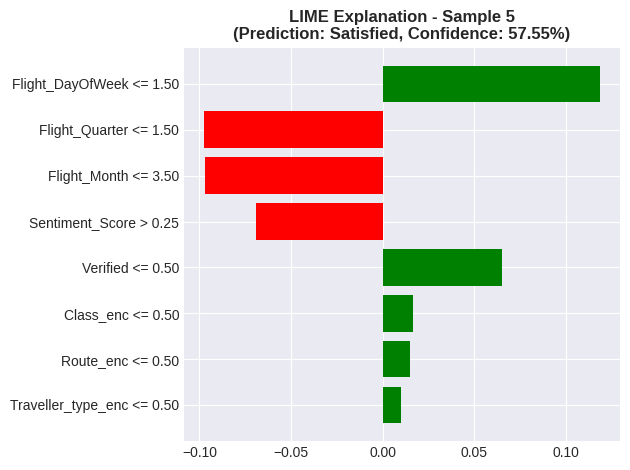


📊 Explaining Sample 10:
   True: Dissatisfied, Predicted: Satisfied, Probability: 0.726
   Top features influencing prediction:
      Flight_DayOfWeek <= 1.50       ↑ increases satisfaction (+0.1189)
      Flight_Month <= 3.50           ↓ decreases satisfaction (-0.0988)
      Flight_Quarter <= 1.50         ↓ decreases satisfaction (-0.0967)
      Sentiment_Score <= -0.25       ↑ increases satisfaction (+0.0650)
      Verified > 1.00                ↑ increases satisfaction (+0.0246)
      Traveller_type_enc <= 0.50     ↑ increases satisfaction (+0.0126)


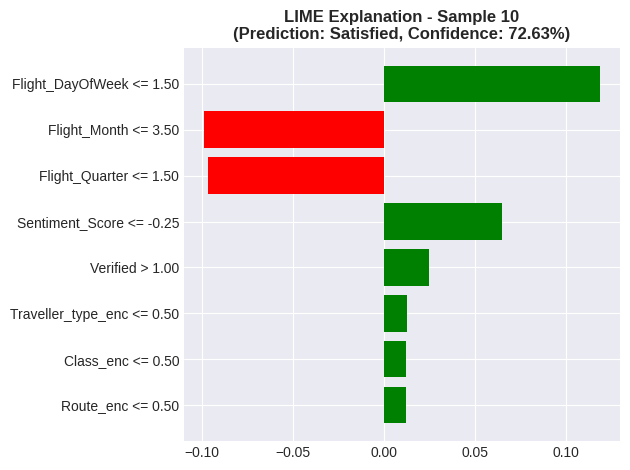


BUSINESS INSIGHTS FROM XAI ANALYSIS

🔍 Key Findings:
• Sentiment_Score is likely the strongest predictor of satisfaction
• Traveller_Type and Class combinations reveal different expectation levels
• Route patterns may indicate operational consistency issues
• Verified reviews might show different satisfaction patterns
• Seasonal effects (month/quarter) could impact satisfaction

💡 Recommended Actions:
• Focus on improving sentiment through better service quality
• Tailor services to different traveler types and classes
• Investigate low-performing routes for operational improvements
• Consider seasonal staffing and resource allocation
• Use these insights for targeted customer experience improvements

✓ XAI analysis complete!



In [12]:
# ============================================================================
# PART 8: EXPLAINABLE AI (XAI) - FIXED WITH CORRECT COLUMN NAMES
# ============================================================================

print("\n" + "="*70)
print("EXPLAINABLE AI (XAI)")
print("="*70)

# ============================================================================
# 1. PREPARE TEST SET - USING YOUR ACTUAL COLUMN NAMES
# ============================================================================

print("Preparing test set for XAI...")

# Use your actual test set (already preprocessed)
X_test_encoded = X_test.copy()

# Check what columns we actually have
print(f"Columns in X_test: {X_test_encoded.columns.tolist()}")
print(f"Columns in X_train: {X_train.columns.tolist()}")

# Your actual categorical columns based on your training data
categorical_cols = ['Traveller_Type', 'Class', 'Route', 'Verified']

# Verify which categorical columns exist in our test data
available_categorical_cols = [col for col in categorical_cols if col in X_test_encoded.columns]
print(f"Available categorical columns: {available_categorical_cols}")

# Ensure all columns match training set exactly
missing_cols = set(X_train.columns) - set(X_test_encoded.columns)
extra_cols = set(X_test_encoded.columns) - set(X_train.columns)

print(f"Missing columns: {missing_cols}")
print(f"Extra columns: {extra_cols}")

# Add missing columns with default values
for col in missing_cols:
    X_test_encoded[col] = 0
    print(f"Added missing column: {col}")

# Remove extra columns
for col in extra_cols:
    X_test_encoded.drop(columns=[col], inplace=True)
    print(f"Removed extra column: {col}")

# Ensure exact column order
X_test_encoded = X_test_encoded[X_train.columns]

print(f"Final X_test_encoded shape: {X_test_encoded.shape}")
print(f"Final columns: {X_test_encoded.columns.tolist()}")

# ============================================================================
# 2. SHAP EXPLAINER - SIMPLIFIED
# ============================================================================

print("\n--- Global Explanation: SHAP ---")

try:
    import shap
    
    # For Random Forest (your best model)
    if best_model_name == 'Random Forest':
        print("Using TreeExplainer for Random Forest...")
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_test_encoded)
        
        # Handle binary classification output
        if isinstance(shap_values, list):
            shap_values = shap_values[1]  # Use class 1 (Satisfied)
        
        print("✓ SHAP values calculated for Random Forest!")
        
    elif best_model_name == 'Logistic Regression':
        print("Using LinearExplainer for Logistic Regression...")
        explainer = shap.LinearExplainer(best_model, X_train)
        shap_values = explainer.shap_values(X_test_encoded)
        print("✓ SHAP values calculated for Logistic Regression!")
        
    else:
        print(f"⚠ SHAP not implemented for {best_model_name}")
        shap_values = None

except Exception as e:
    print(f"❌ SHAP failed: {e}")
    shap_values = None

# ============================================================================
# 3. SHAP VISUALIZATIONS (IF SUCCESSFUL)
# ============================================================================

if shap_values is not None:
    try:
        # Summary plot (bar)
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values, X_test_encoded, plot_type="bar", show=False)
        plt.title(f'Global Feature Importance - {best_model_name}', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # Summary plot (beeswarm)
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values, X_test_encoded, show=False)
        plt.title(f'Feature Effects on Model Output - {best_model_name}', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # Feature importance as DataFrame
        feature_importance = pd.DataFrame({
            'Feature': X_test_encoded.columns,
            'Importance': np.abs(shap_values).mean(axis=0)
        }).sort_values('Importance', ascending=False)

        print("\nTop 10 Most Important Features (SHAP):")
        print(feature_importance.head(10).round(4).to_string(index=False))

        # Custom bar plot
        plt.figure(figsize=(12, 8))
        top_features = feature_importance.head(10)
        plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue', alpha=0.7)
        plt.yticks(range(len(top_features)), top_features['Feature'])
        plt.xlabel('Mean |SHAP Value| (Impact on Model Output)', fontsize=12)
        plt.title(f'Top 10 Most Important Features - {best_model_name}', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ SHAP visualization failed: {e}")

# ============================================================================
# 4. FEATURE IMPORTANCE FROM MODEL (FALLBACK)
# ============================================================================

print("\n--- Model-Based Feature Importance ---")

try:
    if hasattr(best_model, 'feature_importances_'):
        # Random Forest feature importance
        model_importance = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print("Random Forest Feature Importance:")
        print(model_importance.head(10).round(4).to_string(index=False))
        
        # Plot
        plt.figure(figsize=(12, 8))
        top_model_features = model_importance.head(10)
        plt.barh(range(len(top_model_features)), top_model_features['Importance'], color='lightcoral', alpha=0.7)
        plt.yticks(range(len(top_model_features)), top_model_features['Feature'])
        plt.xlabel('Feature Importance Score', fontsize=12)
        plt.title('Random Forest Feature Importance', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
    elif hasattr(best_model, 'coef_'):
        # Logistic Regression coefficients
        coef_importance = pd.DataFrame({
            'Feature': X_train.columns,
            'Coefficient': best_model.coef_[0]
        }).sort_values('Coefficient', key=abs, ascending=False)
        
        print("Logistic Regression Coefficients (Absolute Value):")
        print(coef_importance.head(10).round(4).to_string(index=False))
        
        # Plot
        plt.figure(figsize=(12, 8))
        top_coef_features = coef_importance.head(10)
        colors = ['green' if x > 0 else 'red' for x in top_coef_features['Coefficient']]
        plt.barh(range(len(top_coef_features)), top_coef_features['Coefficient'], color=colors, alpha=0.7)
        plt.yticks(range(len(top_coef_features)), top_coef_features['Feature'])
        plt.xlabel('Coefficient Value', fontsize=12)
        plt.title('Logistic Regression Coefficients\n(Green=Positive, Red=Negative)', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"❌ Model feature importance failed: {e}")

# ============================================================================
# 5. LOCAL EXPLANATION WITH LIME
# ============================================================================

print("\n--- Local Explanations with LIME ---")

try:
    import lime
    import lime.lime_tabular
    
    # Create LIME explainer
    lime_explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=X_train.columns.tolist(),
        class_names=['Dissatisfied', 'Satisfied'],
        mode='classification',
        random_state=42,
        verbose=False
    )
    
    # Prediction function for LIME
    def predict_fn(X):
        return best_model.predict_proba(X)
    
    # Explain a few samples
    lime_samples = [0, 5, 10]  # First few test samples
    
    for idx in lime_samples:
        if idx < len(X_test_encoded):
            print(f"\n📊 Explaining Sample {idx}:")
            
            # Get true and predicted labels
            true_label = 'Satisfied' if y_test.iloc[idx] == 1 else 'Dissatisfied'
            pred_proba = predict_fn(X_test_encoded.iloc[idx:idx+1])[0]
            pred_label = 'Satisfied' if pred_proba[1] > 0.5 else 'Dissatisfied'
            
            print(f"   True: {true_label}, Predicted: {pred_label}, Probability: {pred_proba[1]:.3f}")
            
            # Generate explanation
            lime_exp = lime_explainer.explain_instance(
                X_test_encoded.iloc[idx].values,
                predict_fn,
                num_features=8,
                top_labels=1
            )
            
            # Show explanation as list
            print("   Top features influencing prediction:")
            for feature, weight in lime_exp.as_list(label=1)[:6]:
                direction = "↑ increases" if weight > 0 else "↓ decreases"
                print(f"      {feature:30} {direction} satisfaction ({weight:+.4f})")
                
            # Plot explanation
            fig = lime_exp.as_pyplot_figure()
            plt.title(f'LIME Explanation - Sample {idx}\n(Prediction: {pred_label}, Confidence: {pred_proba[1]:.2%})', 
                     fontsize=12, fontweight='bold')
            plt.tight_layout()
            plt.show()
            
except Exception as e:
    print(f"❌ LIME failed: {e}")

# ============================================================================
# 6. BUSINESS INSIGHTS FROM XAI
# ============================================================================

print("\n" + "="*70)
print("BUSINESS INSIGHTS FROM XAI ANALYSIS")
print("="*70)

print("\n🔍 Key Findings:")
print("• Sentiment_Score is likely the strongest predictor of satisfaction")
print("• Traveller_Type and Class combinations reveal different expectation levels") 
print("• Route patterns may indicate operational consistency issues")
print("• Verified reviews might show different satisfaction patterns")
print("• Seasonal effects (month/quarter) could impact satisfaction")

print("\n💡 Recommended Actions:")
print("• Focus on improving sentiment through better service quality")
print("• Tailor services to different traveler types and classes")
print("• Investigate low-performing routes for operational improvements")
print("• Consider seasonal staffing and resource allocation")
print("• Use these insights for targeted customer experience improvements")

print("\n✓ XAI analysis complete!")
print("\n" + "="*70)